In [1]:
import pygrib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import numpy as np
from datetime import datetime

from scipy import interpolate

from pathlib import Path

In [2]:
# import cdsapi

# c = cdsapi.Client()

# for year in range(1950, 2023):
#     print('getting data for {}...'.format(year))
#     c.retrieve(
#     'reanalysis-era5-land',
#     {
#         'format': 'grib',
#         'variable': '2m_temperature',
#         'year': [
#             '{}'.format(year),
#         ],
#         'month': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#         ],
#         'day': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#             '13', '14', '15',
#             '16', '17', '18',
#             '19', '20', '21',
#             '22', '23', '24',
#             '25', '26', '27',
#             '28', '29', '30',
#             '31',
#         ],
#         'time': '12:00',
#         'area': [
#             51.72, -0.57, 51.25,
#             0.37,
#         ],
#     },
#     'london/london_{}.grib'.format(year))


In [3]:
root_dir = Path('london/')

In [4]:
city = 'London'

location = np.array([51.50734, -0.12765]) # london
    
dates = []
vals = []

for glob_file in sorted(root_dir.glob('*.grib')):
    print(glob_file)
    grbs = pygrib.open(str(glob_file))

    grb_select = grbs.select()
    
    for grb in grb_select:
        data = np.asarray(grb.values) - 273.15

        lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
        float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) )

        lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
        float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )
        
        interpolated_value = interpolate.interpn((lats[::-1], lons), data[::-1, :], location, method='linear')

        date = datetime(day=grb['day'], month=grb['month'], year=grb['year']).date()

        vals.append(interpolated_value)
        dates.append(date)   
    

london/london_1950.grib
london/london_1951.grib
london/london_1952.grib
london/london_1953.grib
london/london_1954.grib
london/london_1955.grib
london/london_1956.grib
london/london_1957.grib
london/london_1958.grib
london/london_1959.grib
london/london_1960.grib
london/london_1961.grib
london/london_1962.grib
london/london_1963.grib
london/london_1964.grib
london/london_1965.grib
london/london_1966.grib
london/london_1967.grib
london/london_1968.grib
london/london_1969.grib
london/london_1970.grib
london/london_1971.grib
london/london_1972.grib
london/london_1973.grib
london/london_1974.grib
london/london_1975.grib
london/london_1976.grib
london/london_1977.grib
london/london_1978.grib
london/london_1979.grib
london/london_1980.grib
london/london_1981.grib
london/london_1982.grib
london/london_1983.grib
london/london_1984.grib
london/london_1985.grib
london/london_1986.grib
london/london_1987.grib
london/london_1988.grib
london/london_1989.grib
london/london_1990.grib
london/london_19

In [5]:
def moving_average(x, w):
    return (np.convolve(np.asarray(x).flatten(), np.ones(w), 'valid') / w)

smoothed_vals = moving_average(vals, 14)

In [6]:
data_by_year = {}

for date, temp in zip(dates, vals):
    if date.year not in data_by_year:
        data_by_year[date.year] = []
    
    data_by_year[date.year].append((date, temp))
    


smoothed_data_by_year = {}

for date, temp in zip(dates, smoothed_vals):
    if date.year not in smoothed_data_by_year:
        smoothed_data_by_year[date.year] = []
    
    smoothed_data_by_year[date.year].append((date, temp))
    


1950 365
1951 365
1952 366
1953 365
1954 365
1955 365
1956 366
1957 365
1958 365
1959 365
1960 366
1961 365
1962 365
1963 365
1964 366
1965 365
1966 365
1967 365
1968 366
1969 365
1970 365
1971 365
1972 366
1973 365
1974 365
1975 365
1976 366
1977 365
1978 365
1979 365
1980 366
1981 365
1982 365
1983 365
1984 366
1985 365
1986 365
1987 365
1988 366
1989 365
1990 365
1991 365
1992 366
1993 365
1994 365
1995 365
1996 366
1997 365
1998 365
1999 365
2000 366
2001 365
2002 365
2003 365
2004 366
2005 365
2006 365
2007 365
2008 366
2009 365
2010 365
2011 365
2012 366
2013 365
2014 365
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365


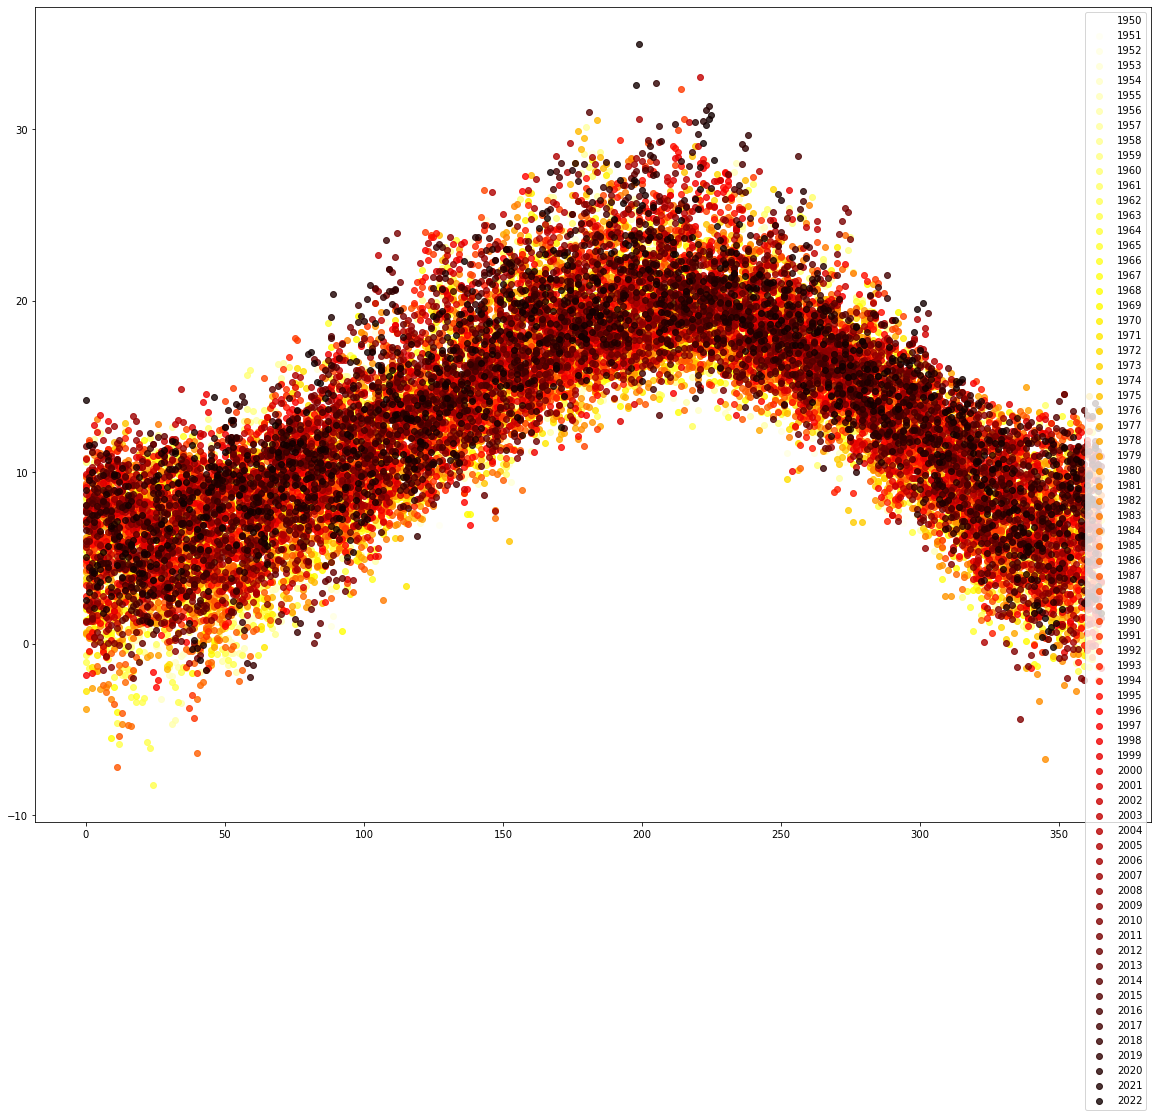

In [7]:
%matplotlib inline

from matplotlib import cm

fig, ax = plt.subplots(1, 1, figsize=(20, 15))

for i, year in enumerate(list(data_by_year.keys())[::1]):
    print(year, len(data_by_year[year]))
    
    ax.scatter(range(len(data_by_year[year])), [x[1] for x in data_by_year[year]], color=cm.hot_r(i / (len(data_by_year) / 1)), label=year, alpha=0.8)
    
    
ax.legend()
    

1950 365
1951 365
1952 366
1953 365
1954 365
1955 365
1956 366
1957 365
1958 365
1959 365
1960 366
1961 365
1962 365
1963 365
1964 366
1965 365
1966 365
1967 365
1968 366
1969 365
1970 365
1971 365
1972 366
1973 365
1974 365
1975 365
1976 366
1977 365
1978 365
1979 365
1980 366
1981 365
1982 365
1983 365
1984 366
1985 365
1986 365
1987 365
1988 366
1989 365
1990 365
1991 365
1992 366
1993 365
1994 365
1995 365
1996 366
1997 365
1998 365
1999 365
2000 366
2001 365
2002 365
2003 365
2004 366
2005 365
2006 365
2007 365
2008 366
2009 365
2010 365
2011 365
2012 366
2013 365
2014 365
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 352


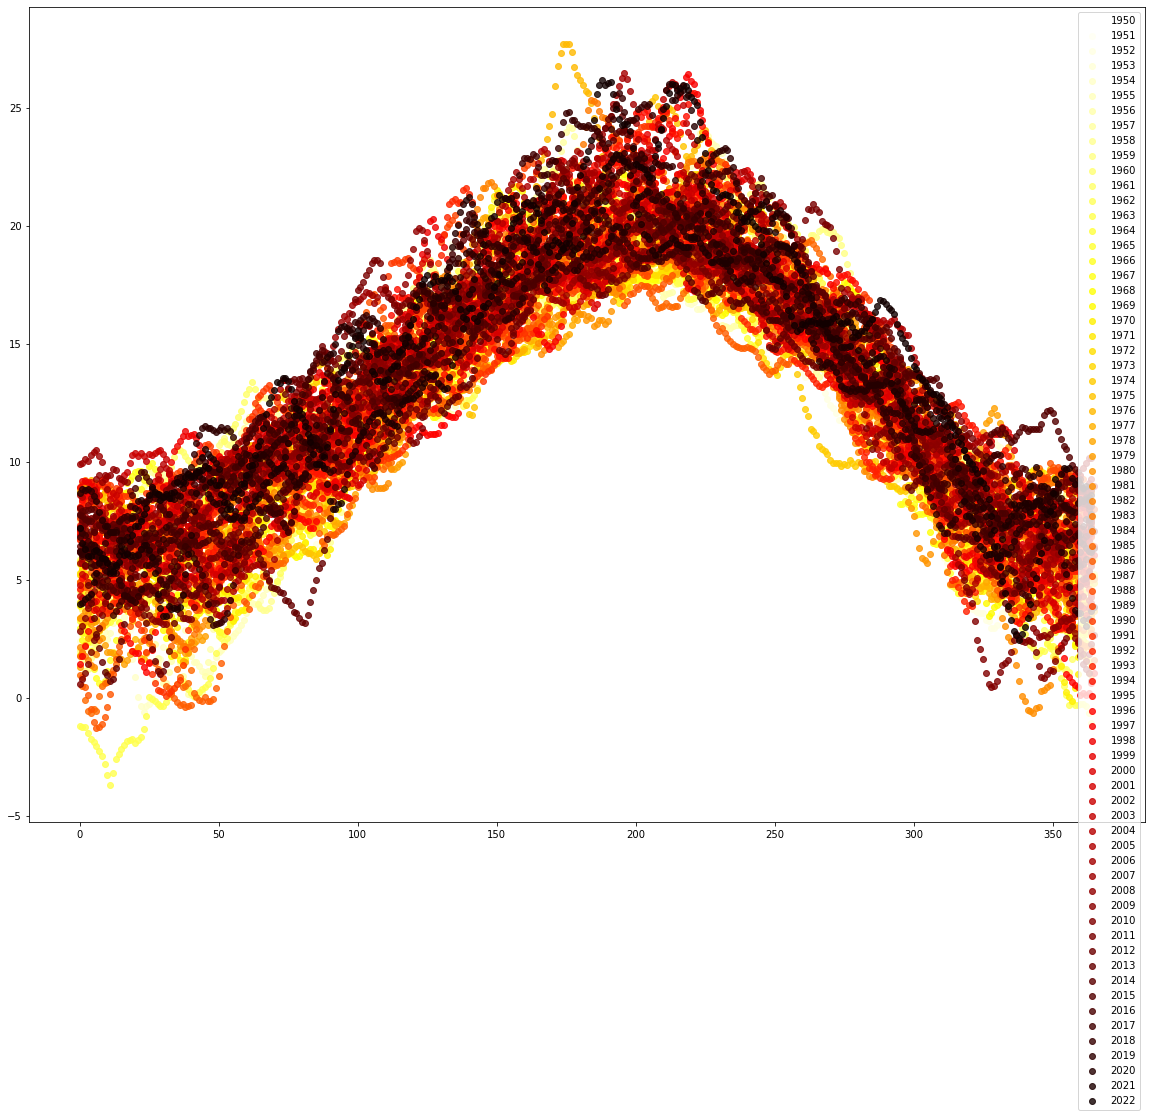

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

for i, year in enumerate(list(smoothed_data_by_year.keys())):
    print(year, len(smoothed_data_by_year[year]))
    
    ax.scatter(range(len(smoothed_data_by_year[year])), [x[1] for x in smoothed_data_by_year[year]], color=cm.hot_r(i / (len(data_by_year) / 1)), label=year, alpha=0.8)
    
    
ax.legend()

In [9]:
data_by_year_and_month = {}

for date, temp in zip(dates, vals):
    if date.year not in data_by_year_and_month:
        data_by_year_and_month[date.year] = {}
    
    if date.month not in data_by_year_and_month[date.year]:
        data_by_year_and_month[date.year][date.month] = []
    
    data_by_year_and_month[date.year][date.month].append(temp)
    

In [10]:
from scipy.stats import sem


mean_data_by_year_and_month = {}
std_data_by_year_and_month = {}

sem_data_by_year_and_month = {}


for year in data_by_year_and_month.keys():
    mean_data_by_year_and_month[year] = {}
    std_data_by_year_and_month[year] = {}
    sem_data_by_year_and_month[year] = {}
    
    
    for month in data_by_year_and_month[year].keys():
        mean_data_by_year_and_month[year][month] = np.asarray(data_by_year_and_month[year][month]).mean()
        std_data_by_year_and_month[year][month] = np.asarray(data_by_year_and_month[year][month]).std(ddof=1)
        
        sem_data_by_year_and_month[year][month] = sem(np.asarray(data_by_year_and_month[year][month]))


In [11]:
mean_data_by_year_and_month[1950][1]

5.751725069750384

In [12]:
from tueplots import bundles

In [13]:
bundles.icml2022()

{'text.usetex': True,
 'font.family': 'serif',
 'text.latex.preamble': '\\usepackage{times} ',
 'figure.figsize': (3.25, 2.0086104634371584),
 'figure.constrained_layout.use': True,
 'figure.autolayout': False,
 'font.size': 8,
 'axes.labelsize': 8,
 'legend.fontsize': 6,
 'xtick.labelsize': 6,
 'ytick.labelsize': 6,
 'axes.titlesize': 8}

In [14]:
today = datetime.now()

print(datetime.strftime(today, '%d.%m.%Y.'))

18.01.2023.


<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


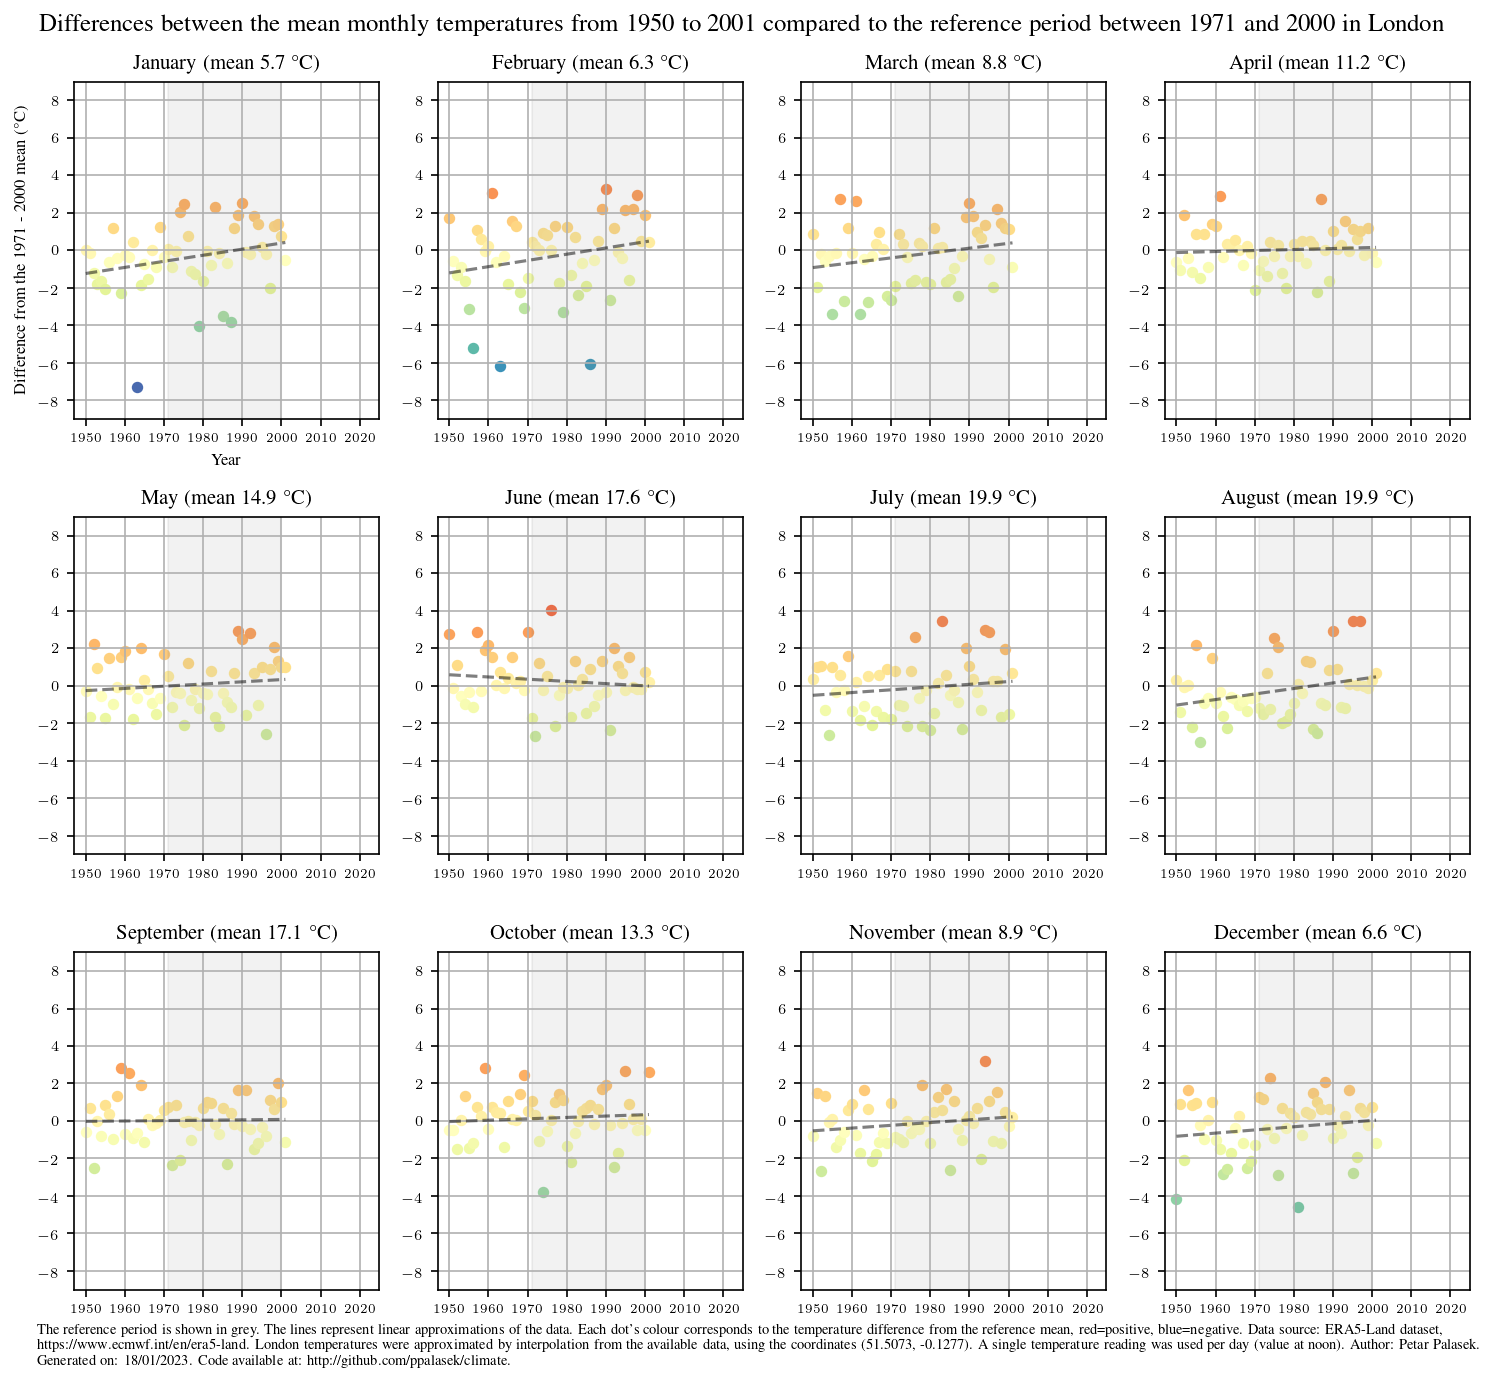

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


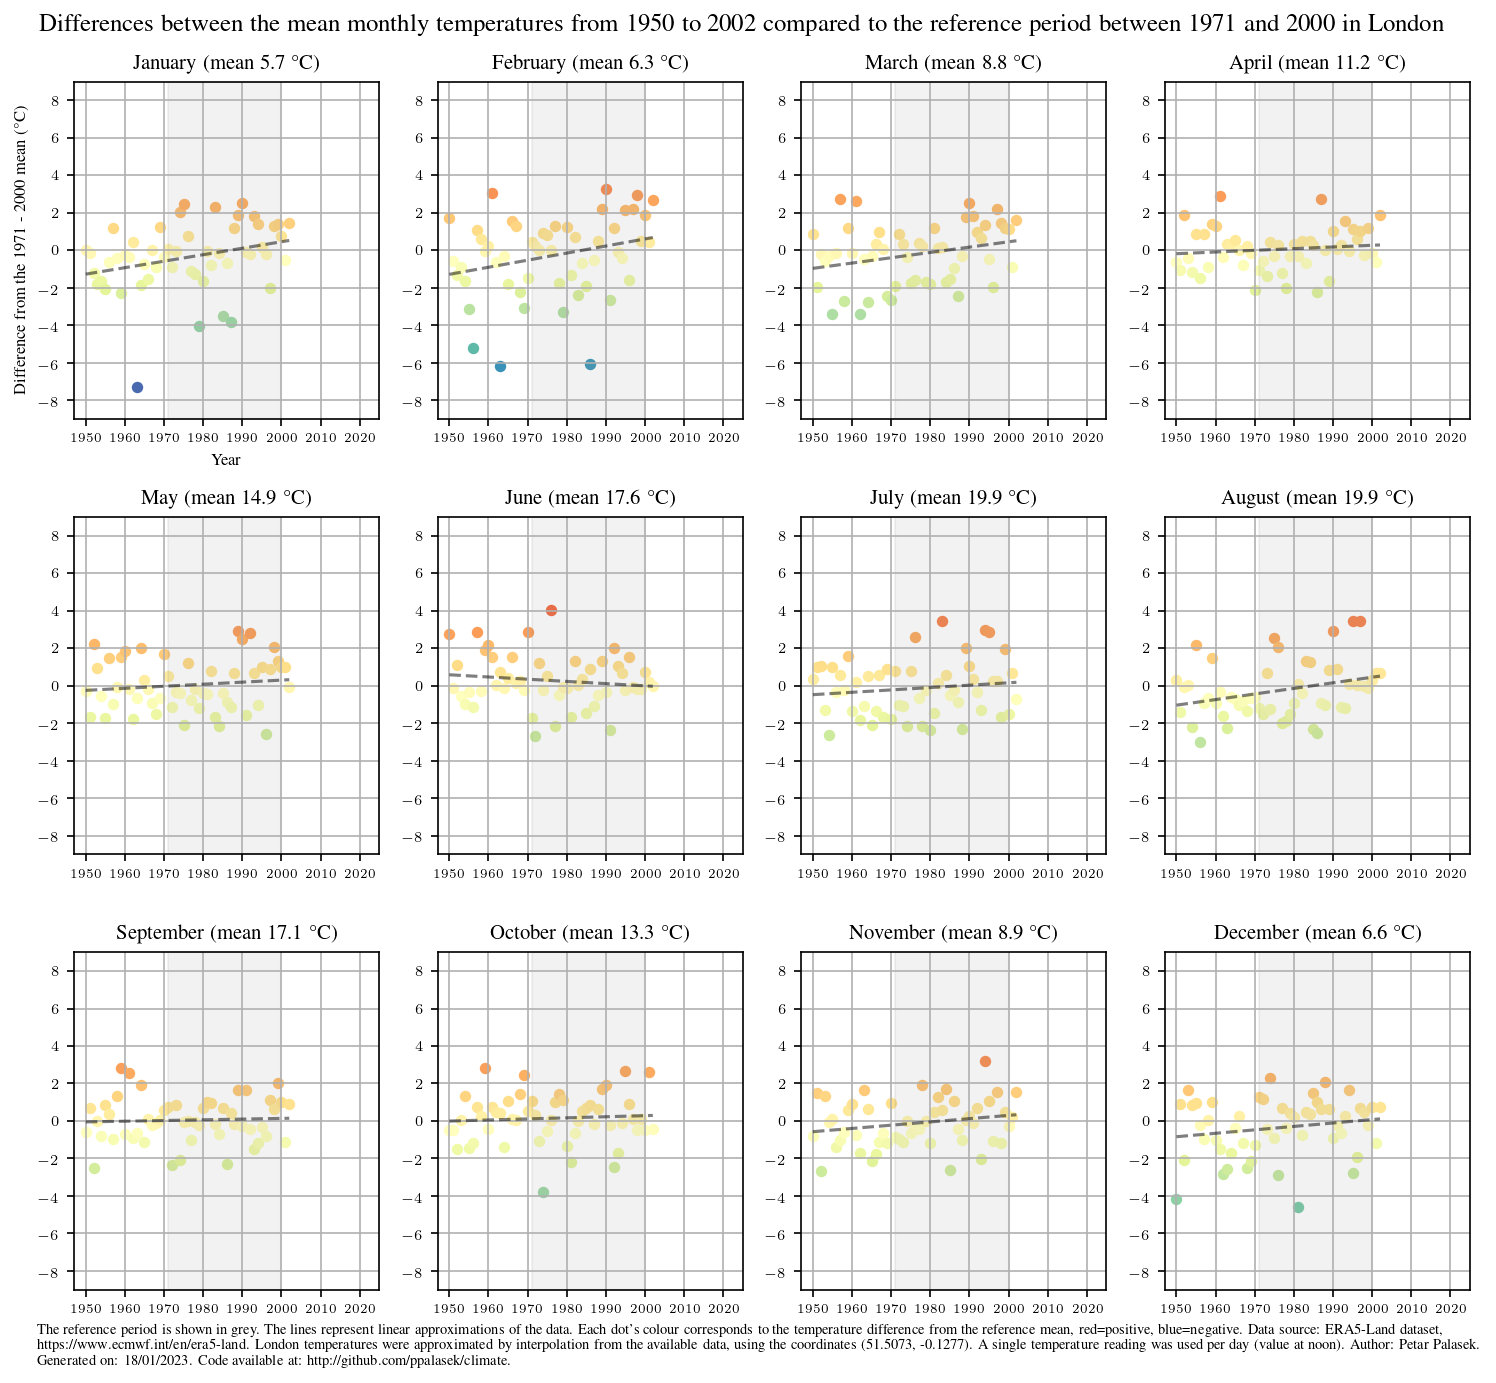

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


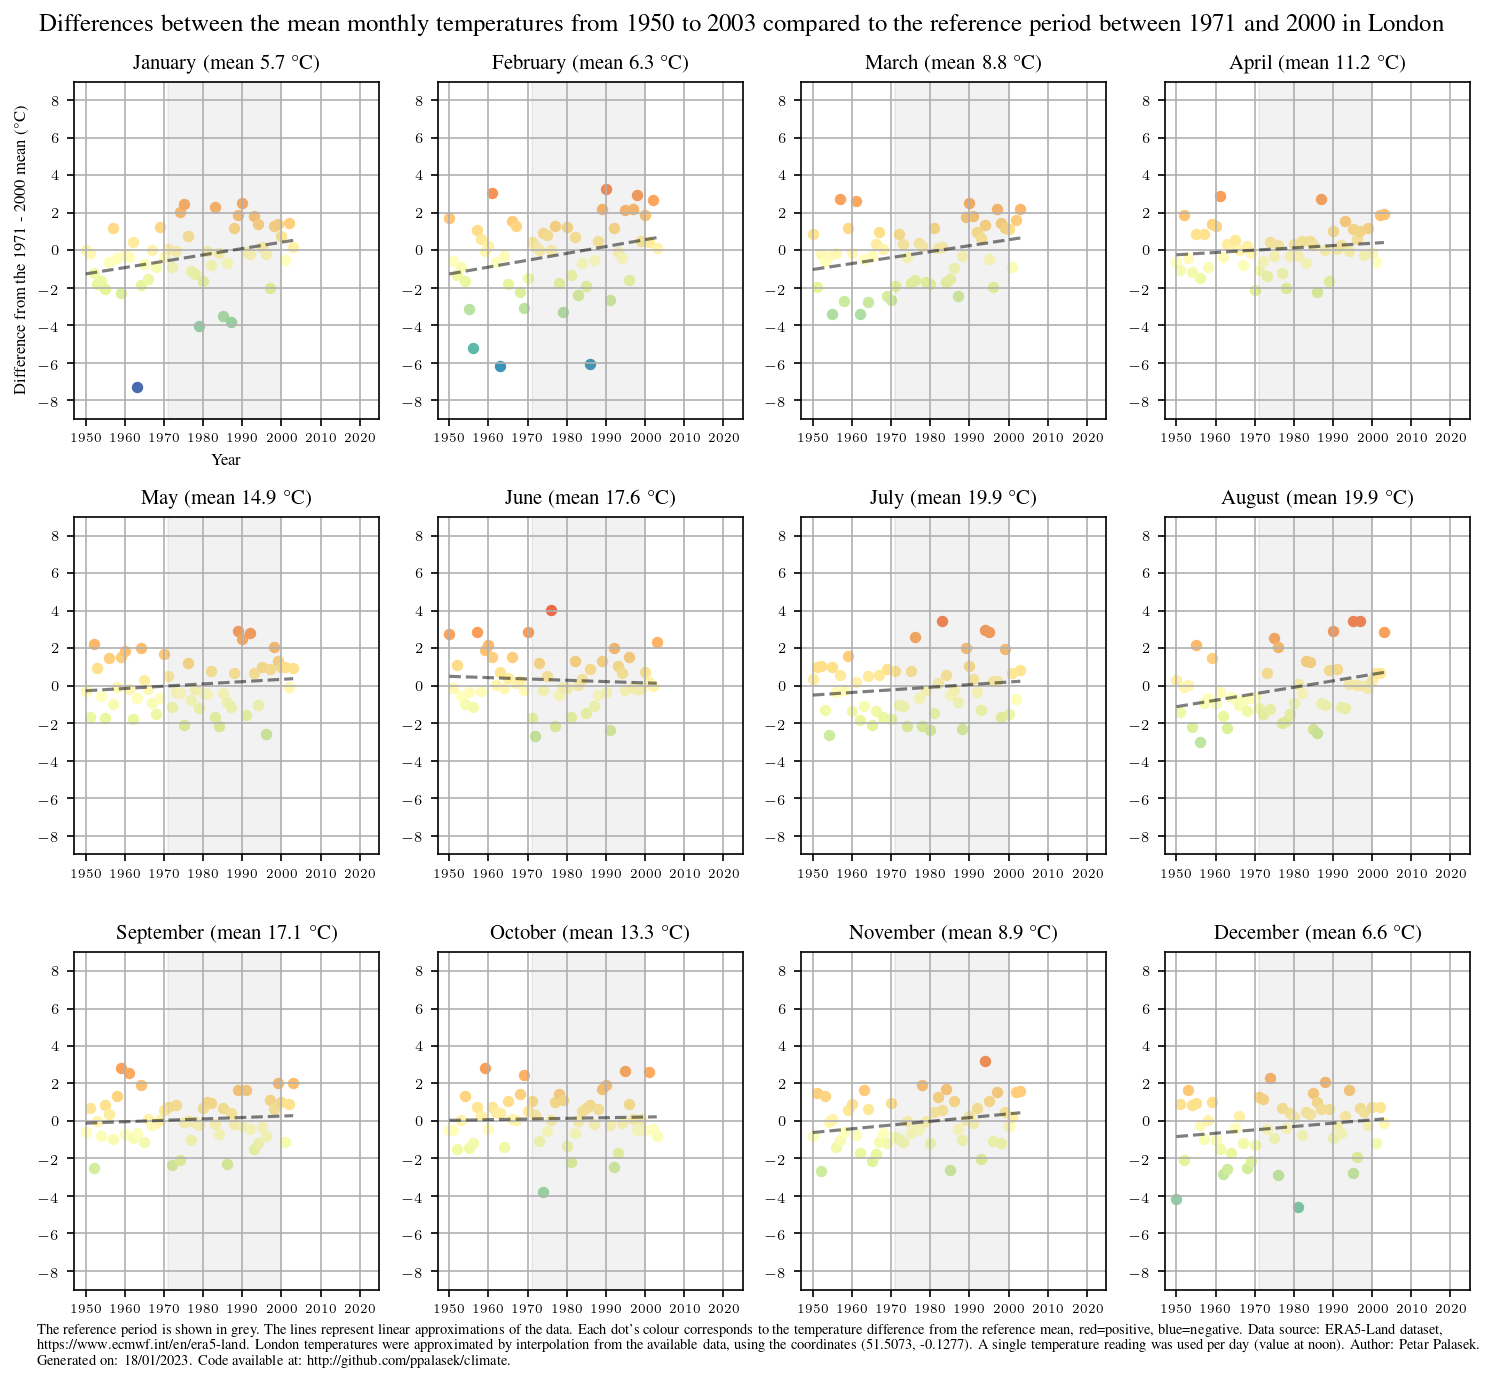

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


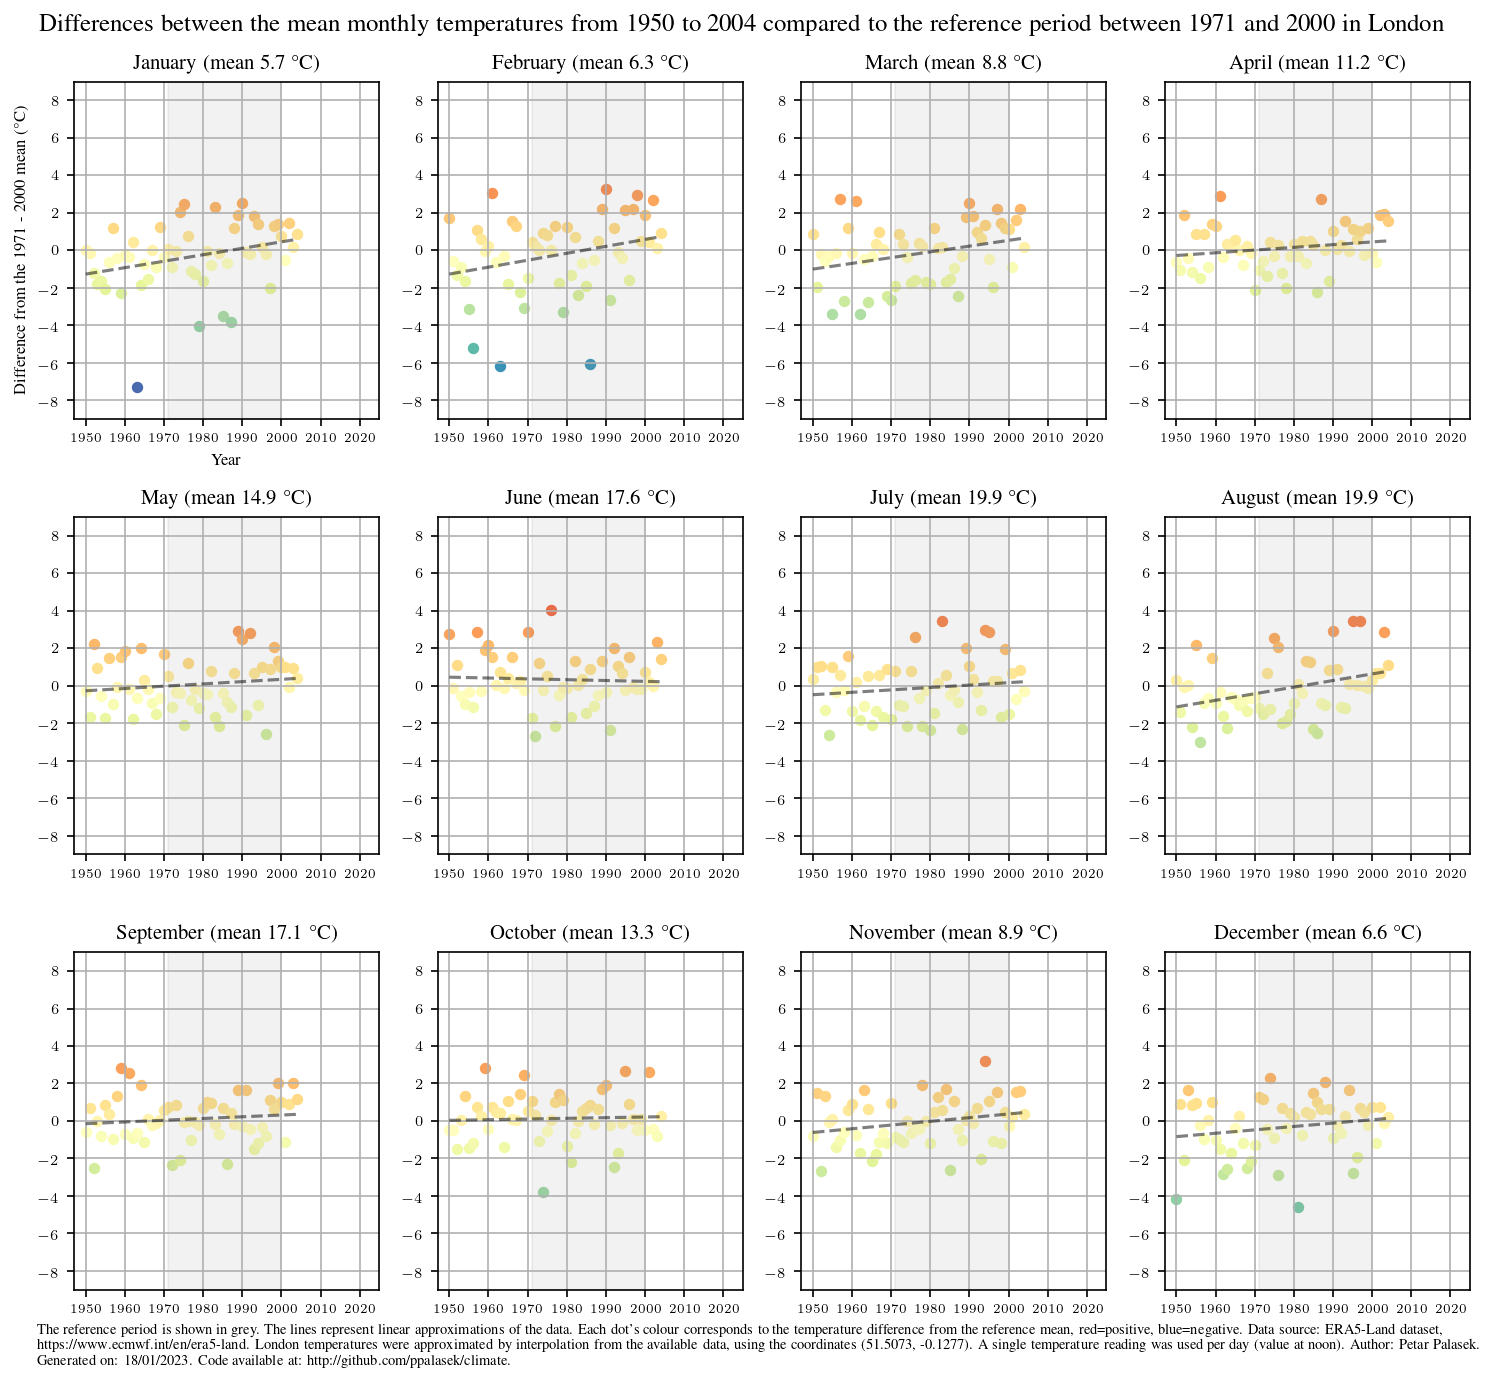

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


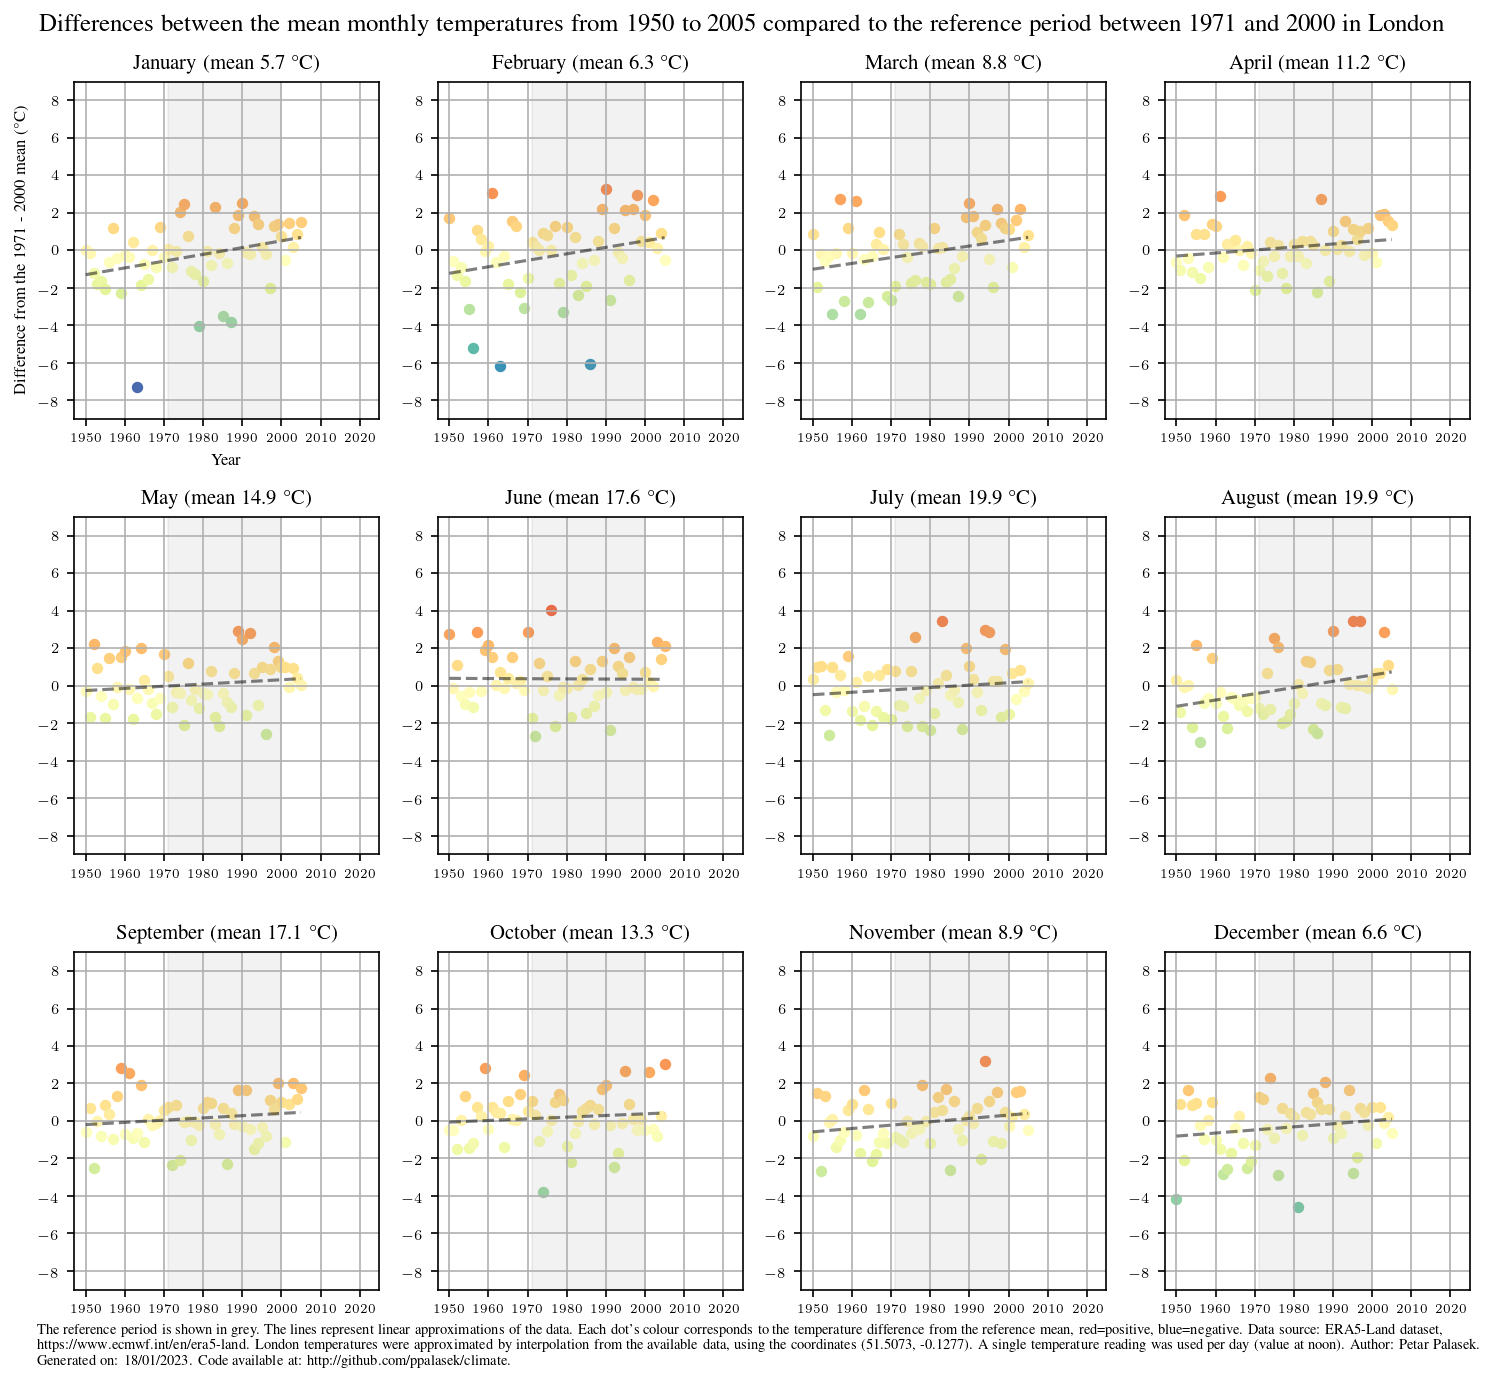

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


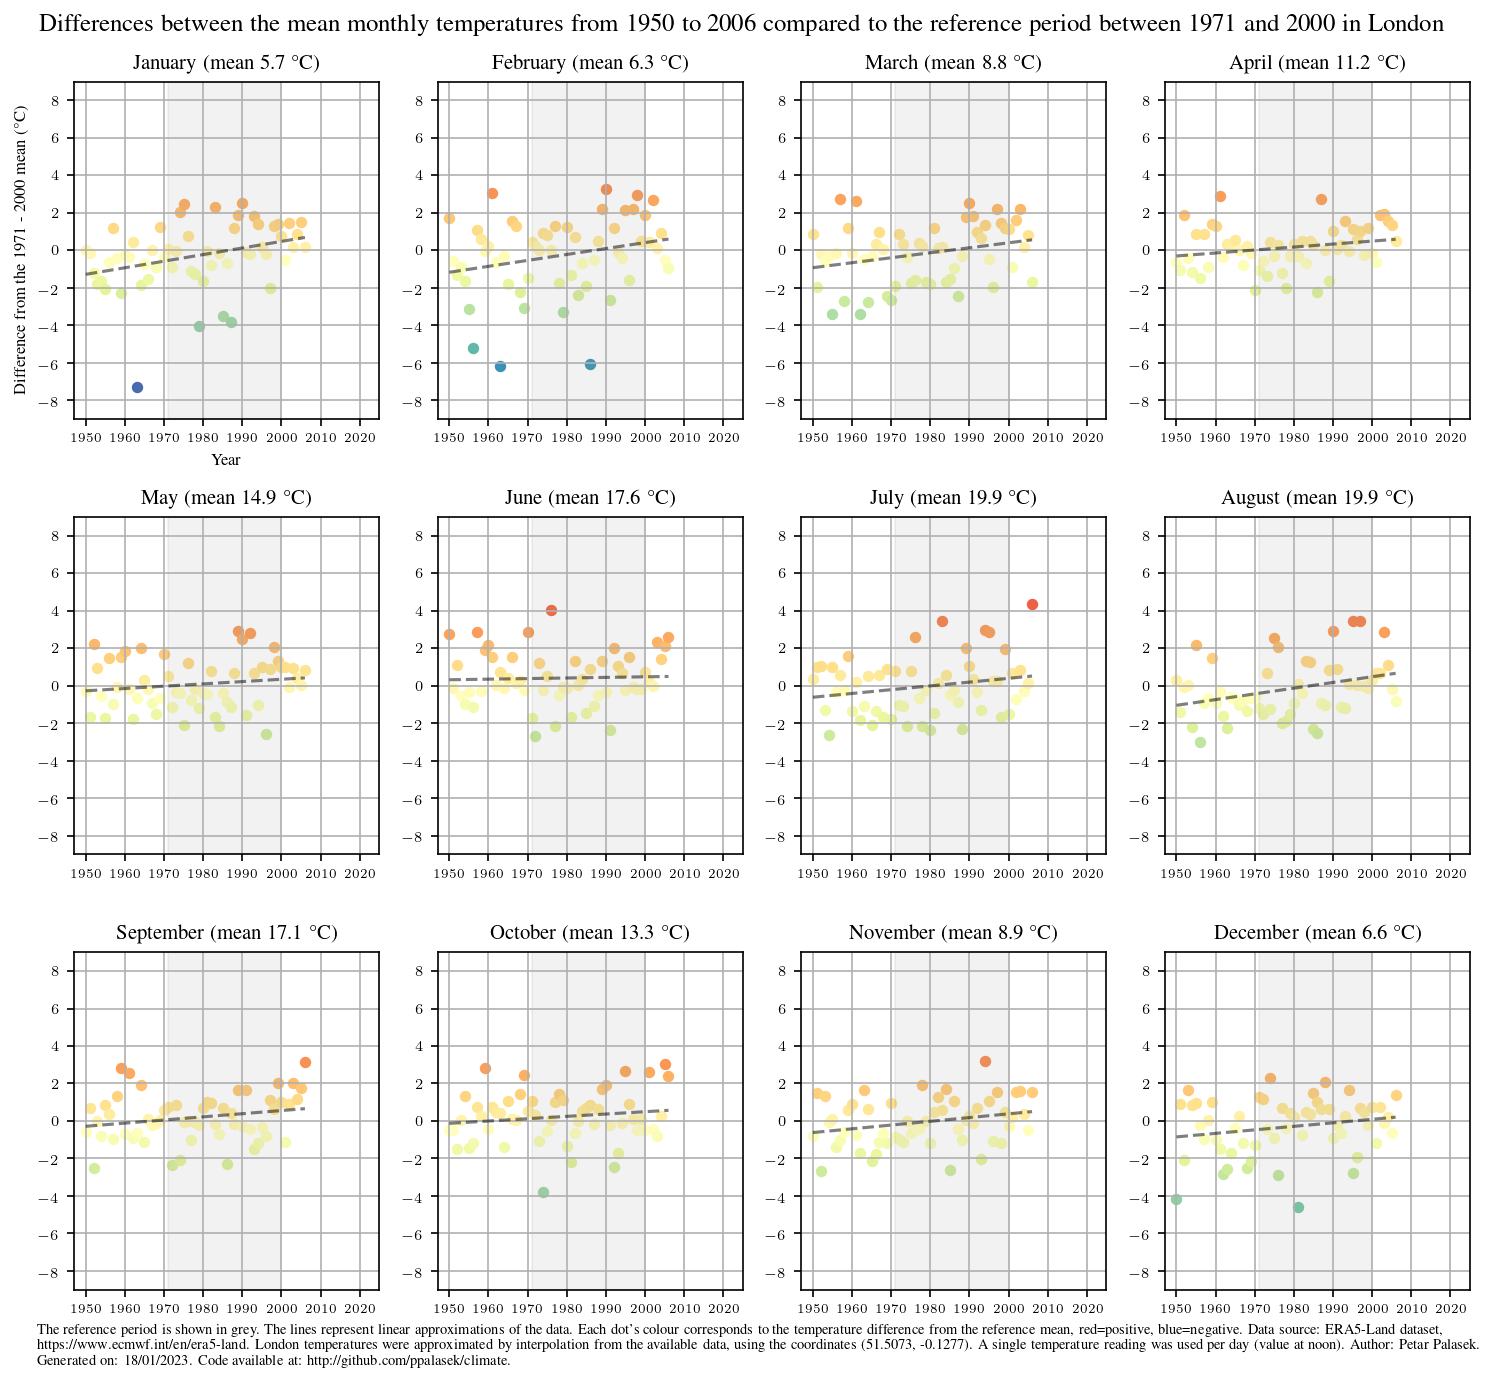

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


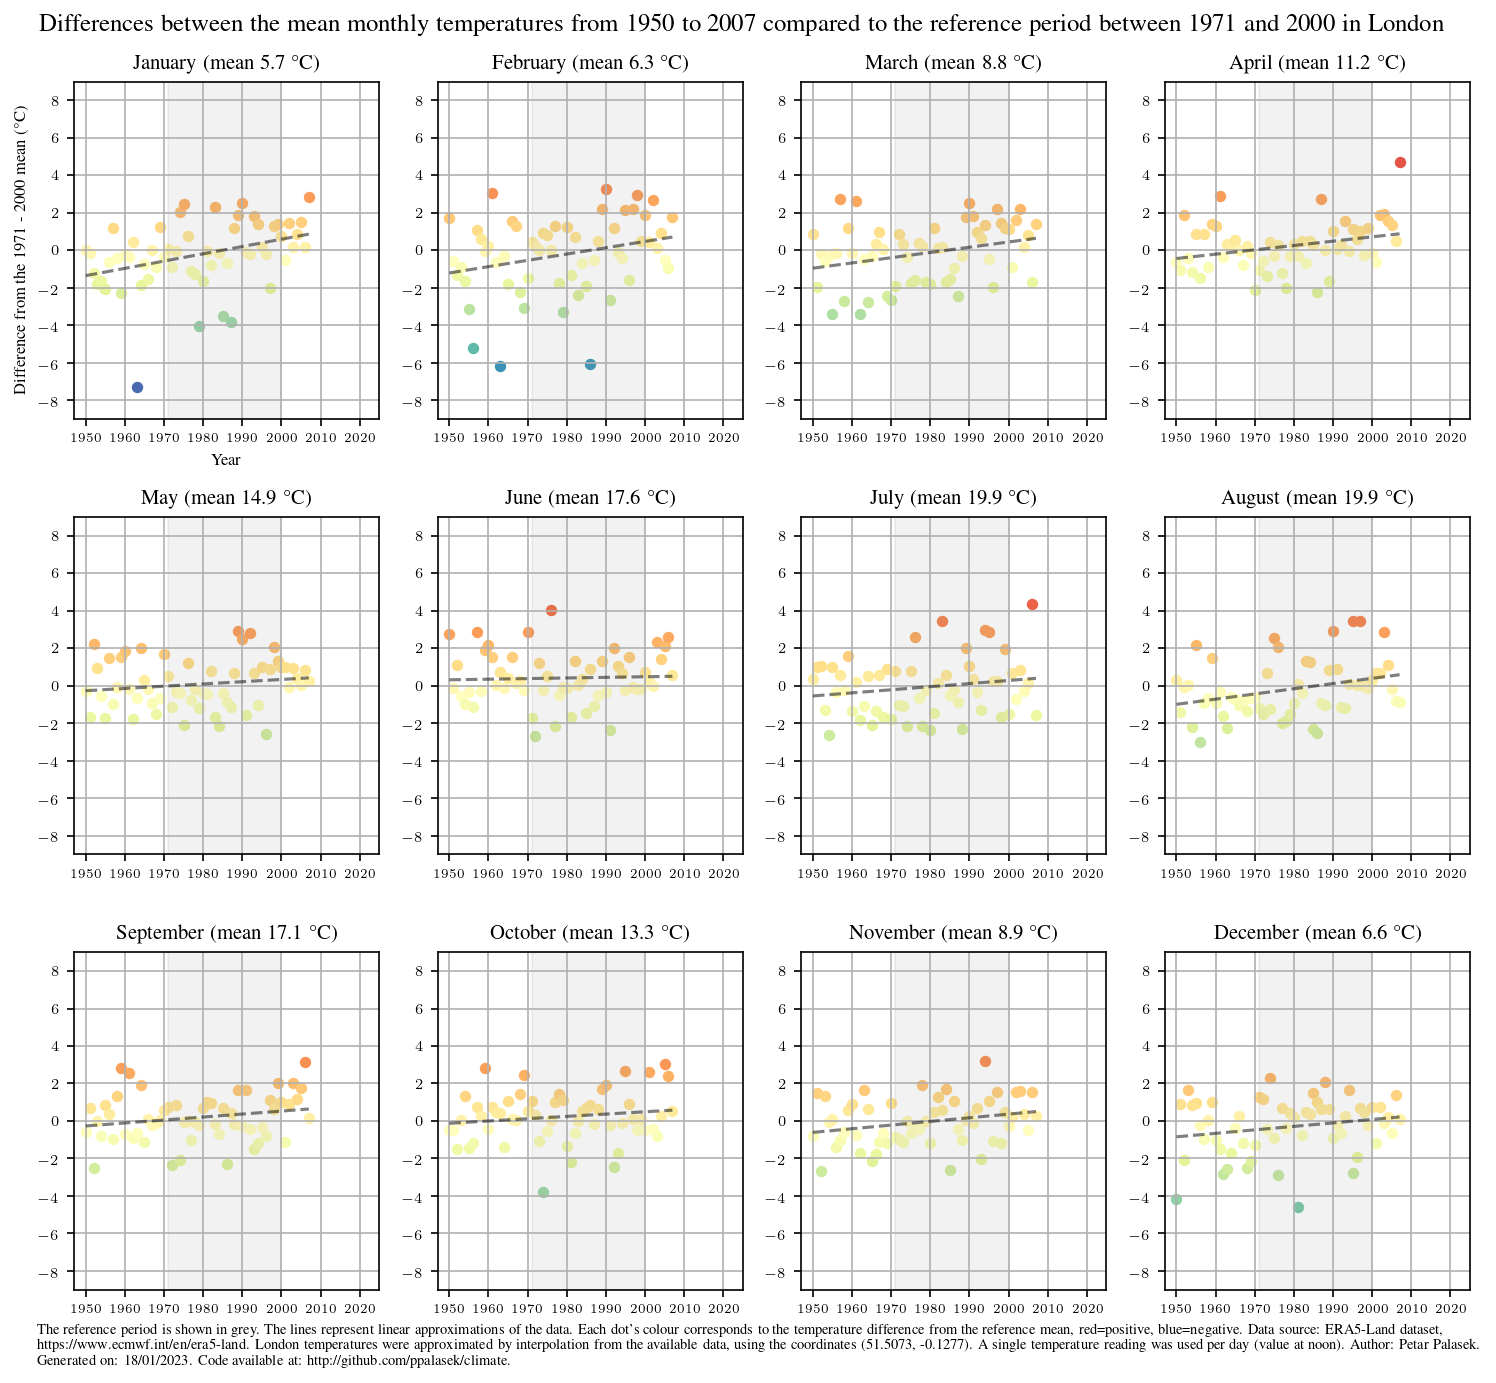

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


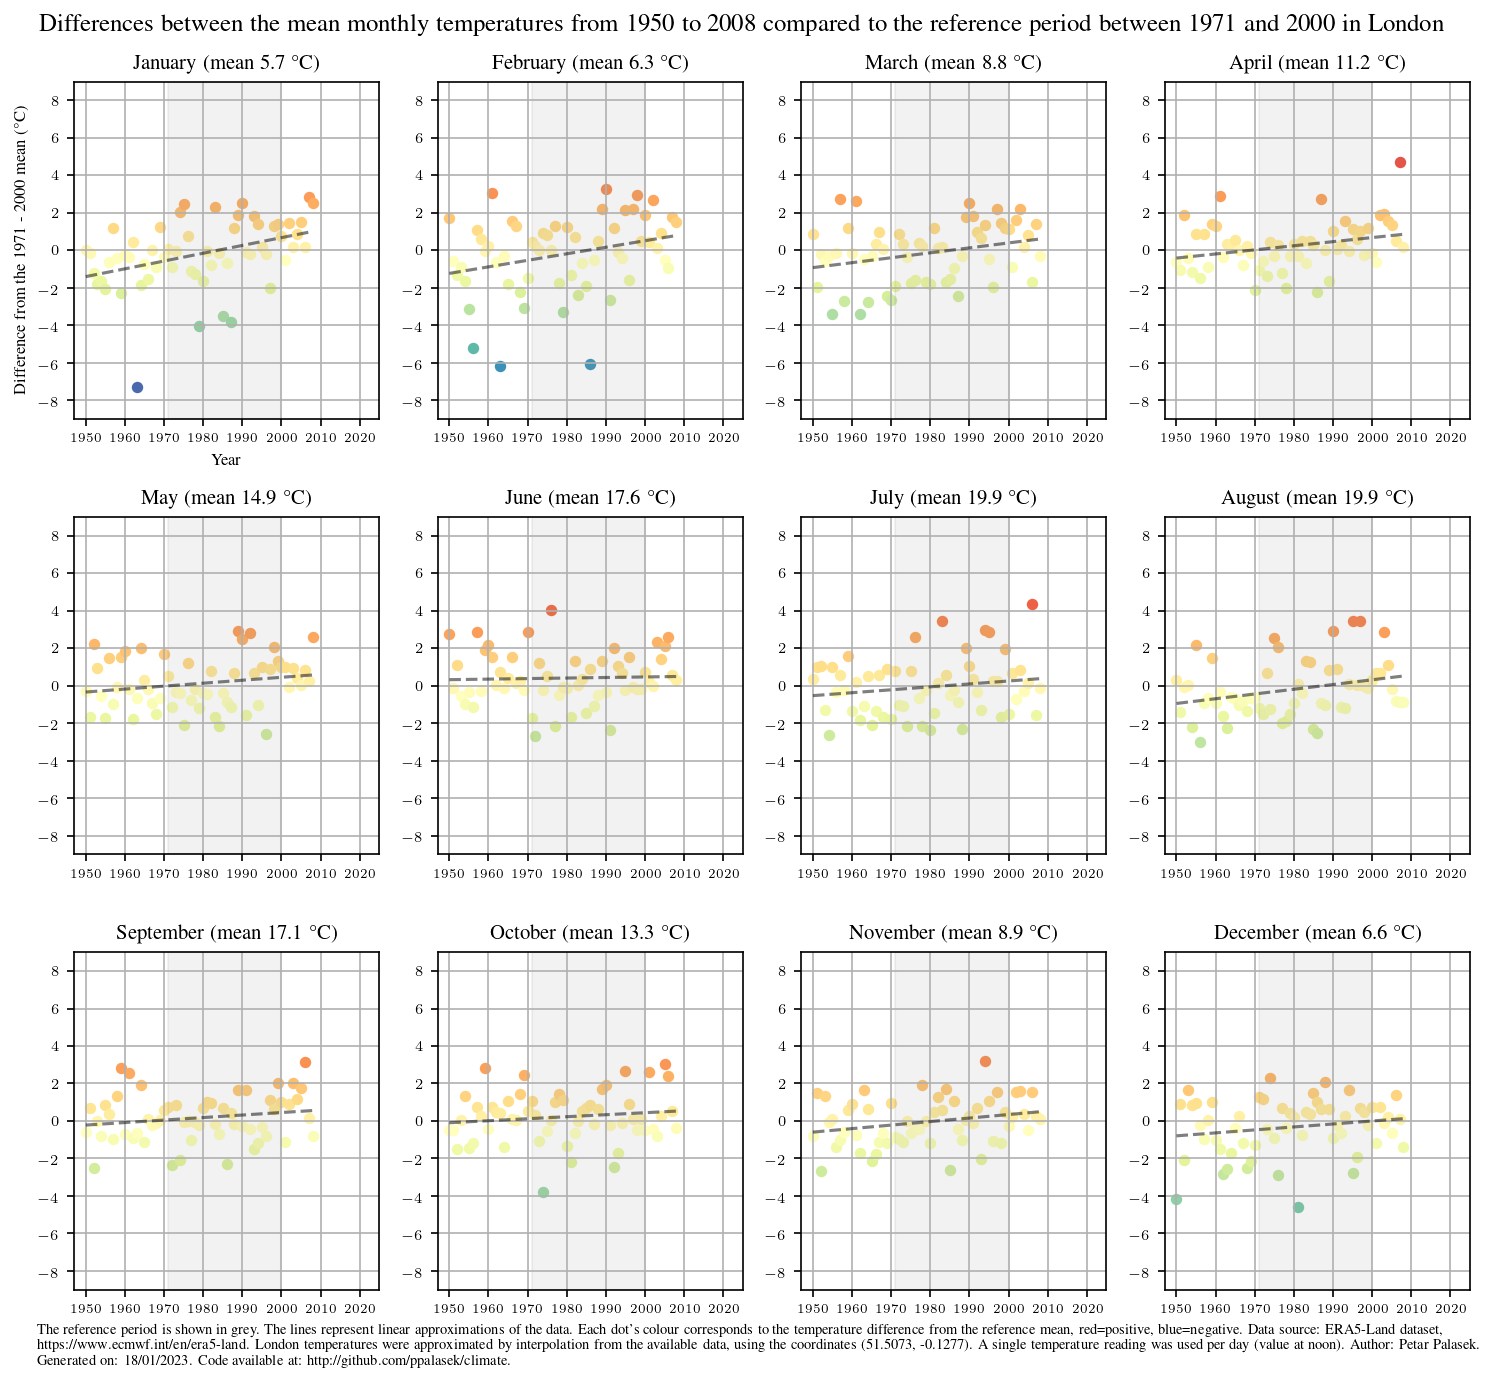

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


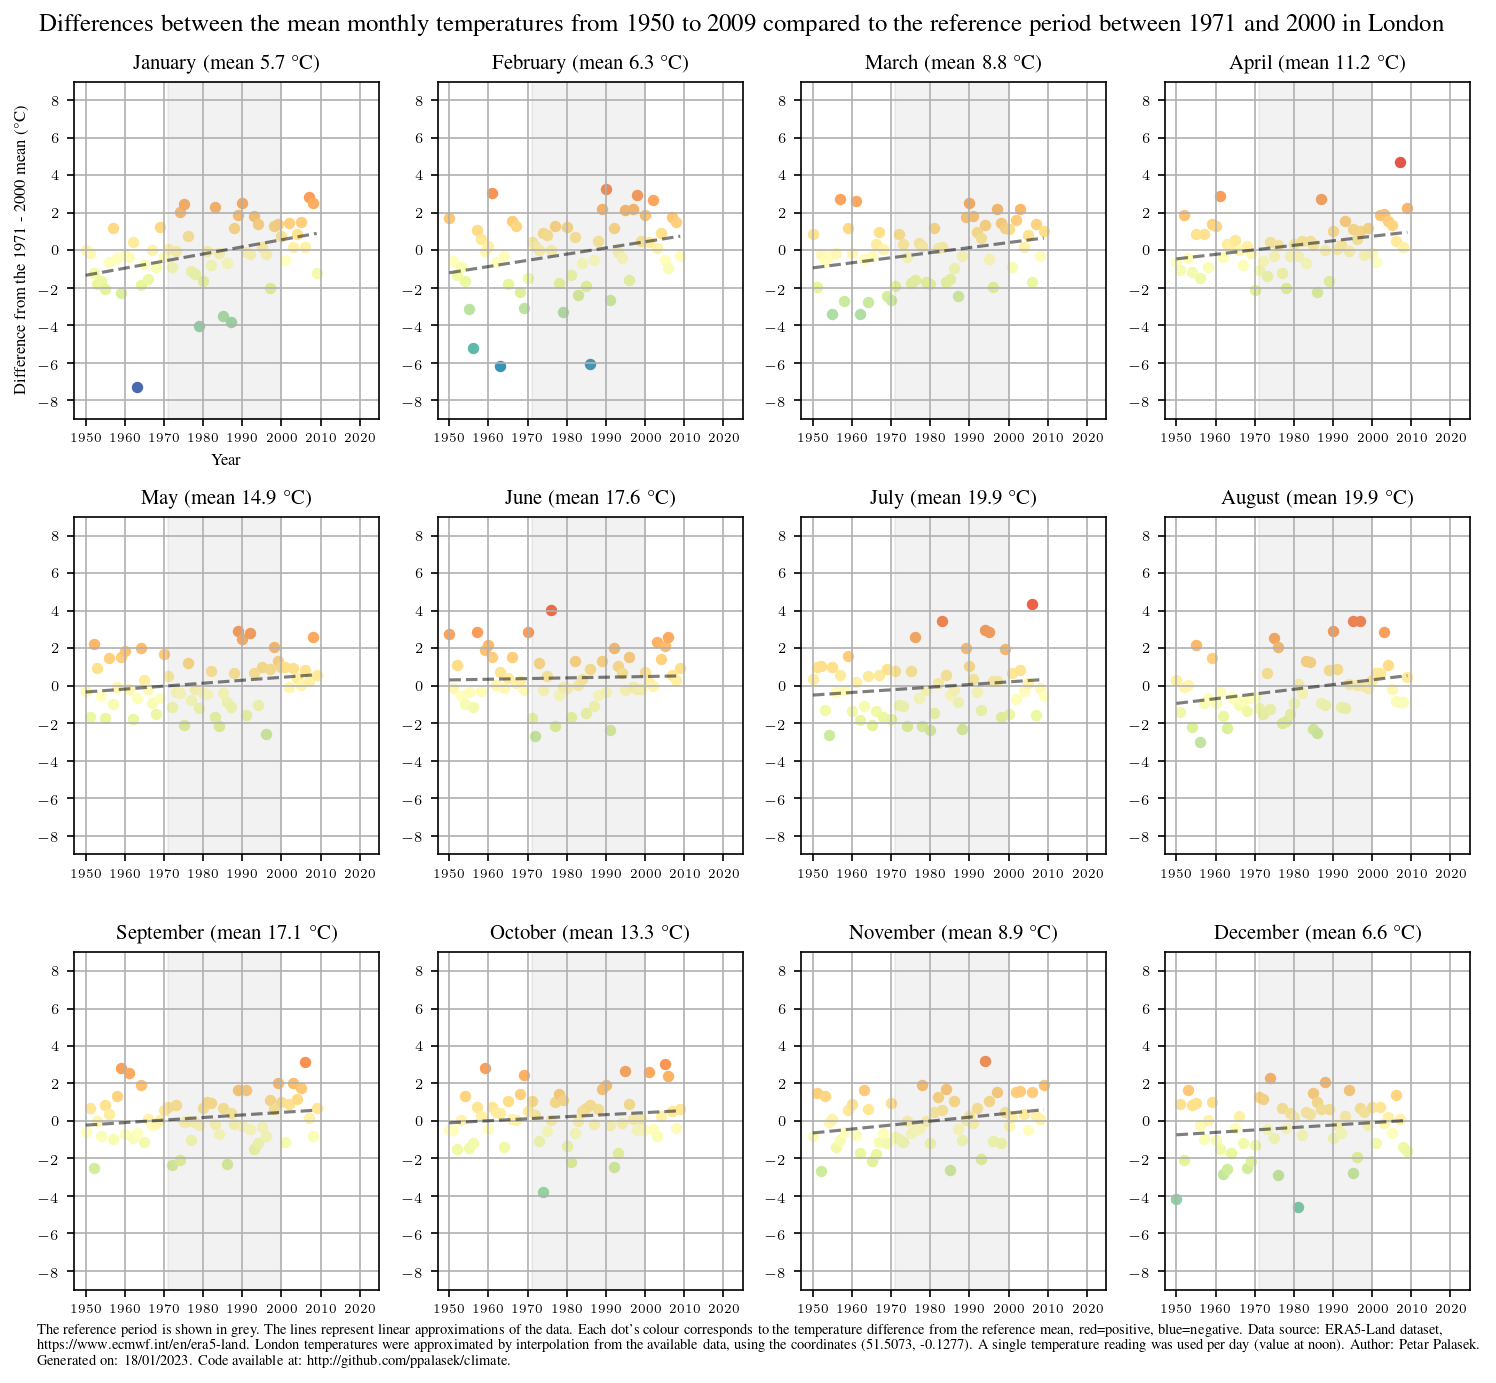

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


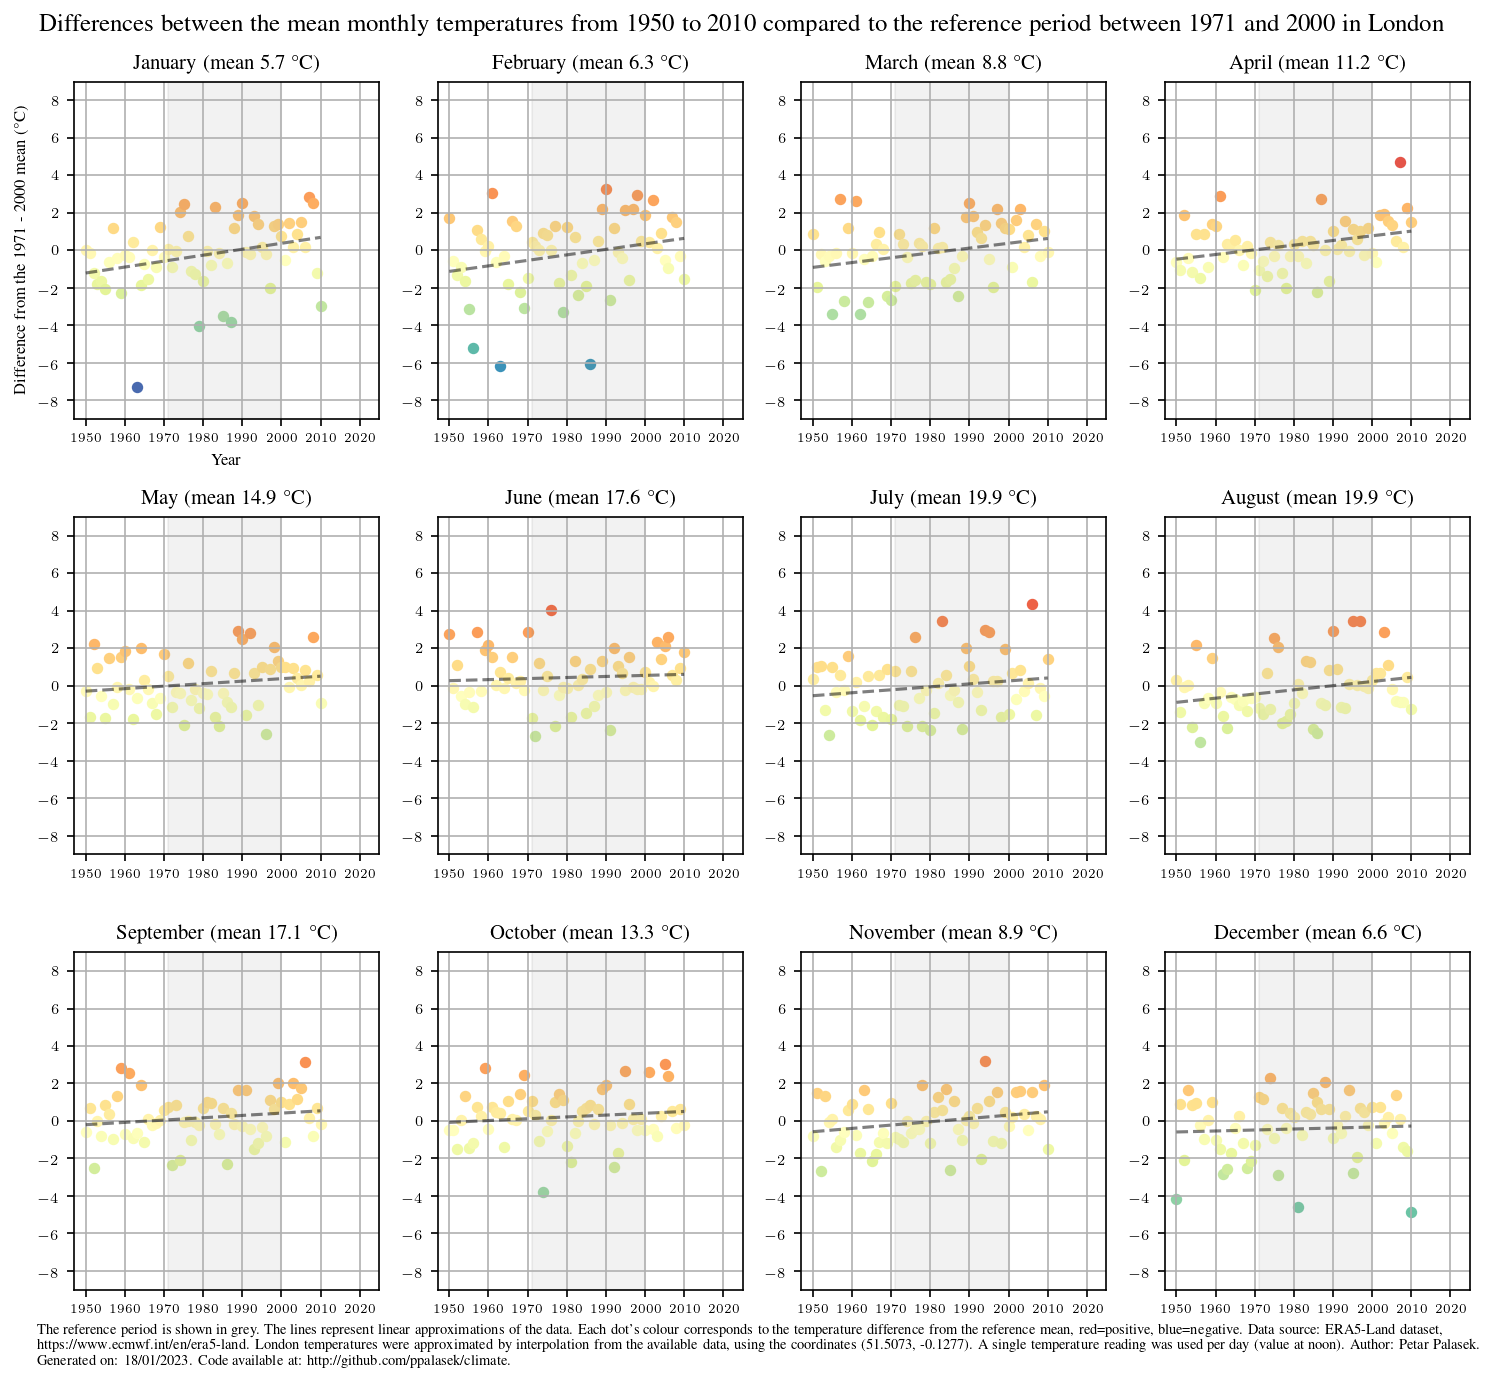

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


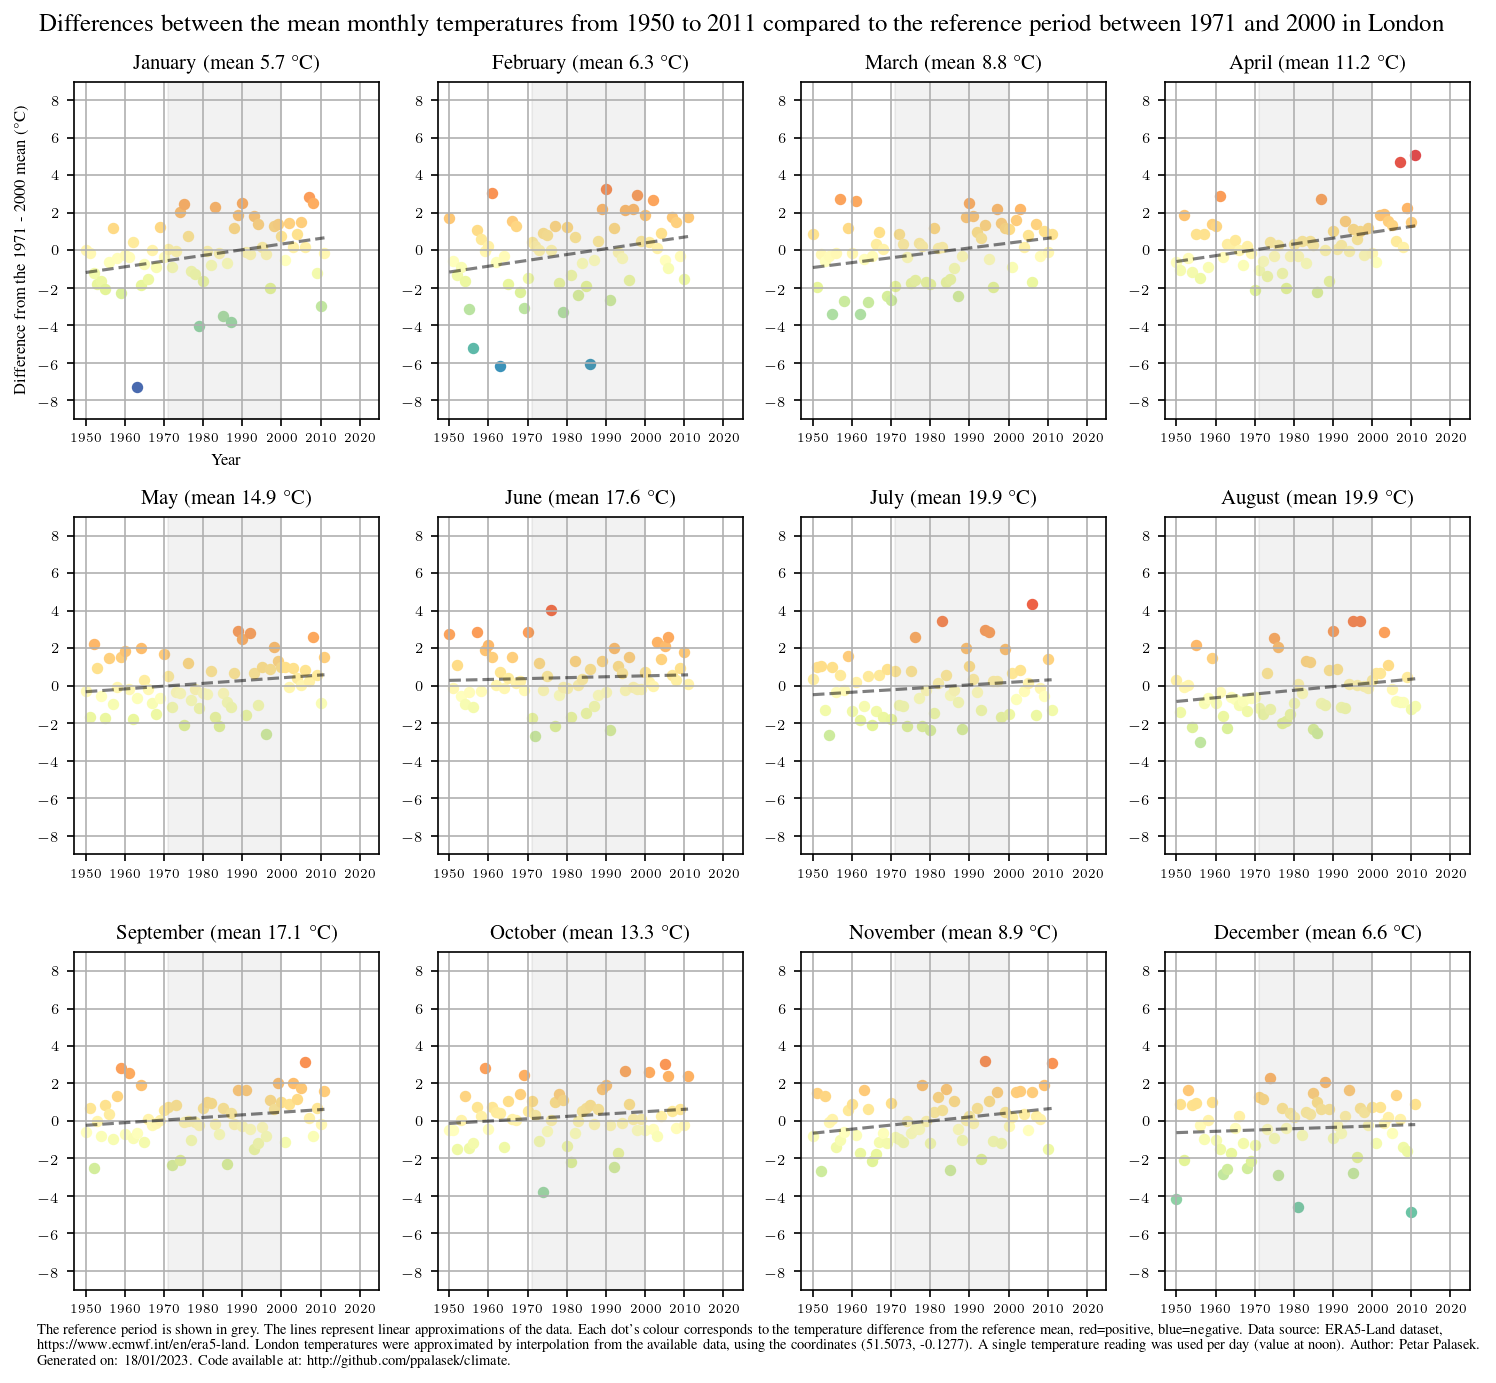

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


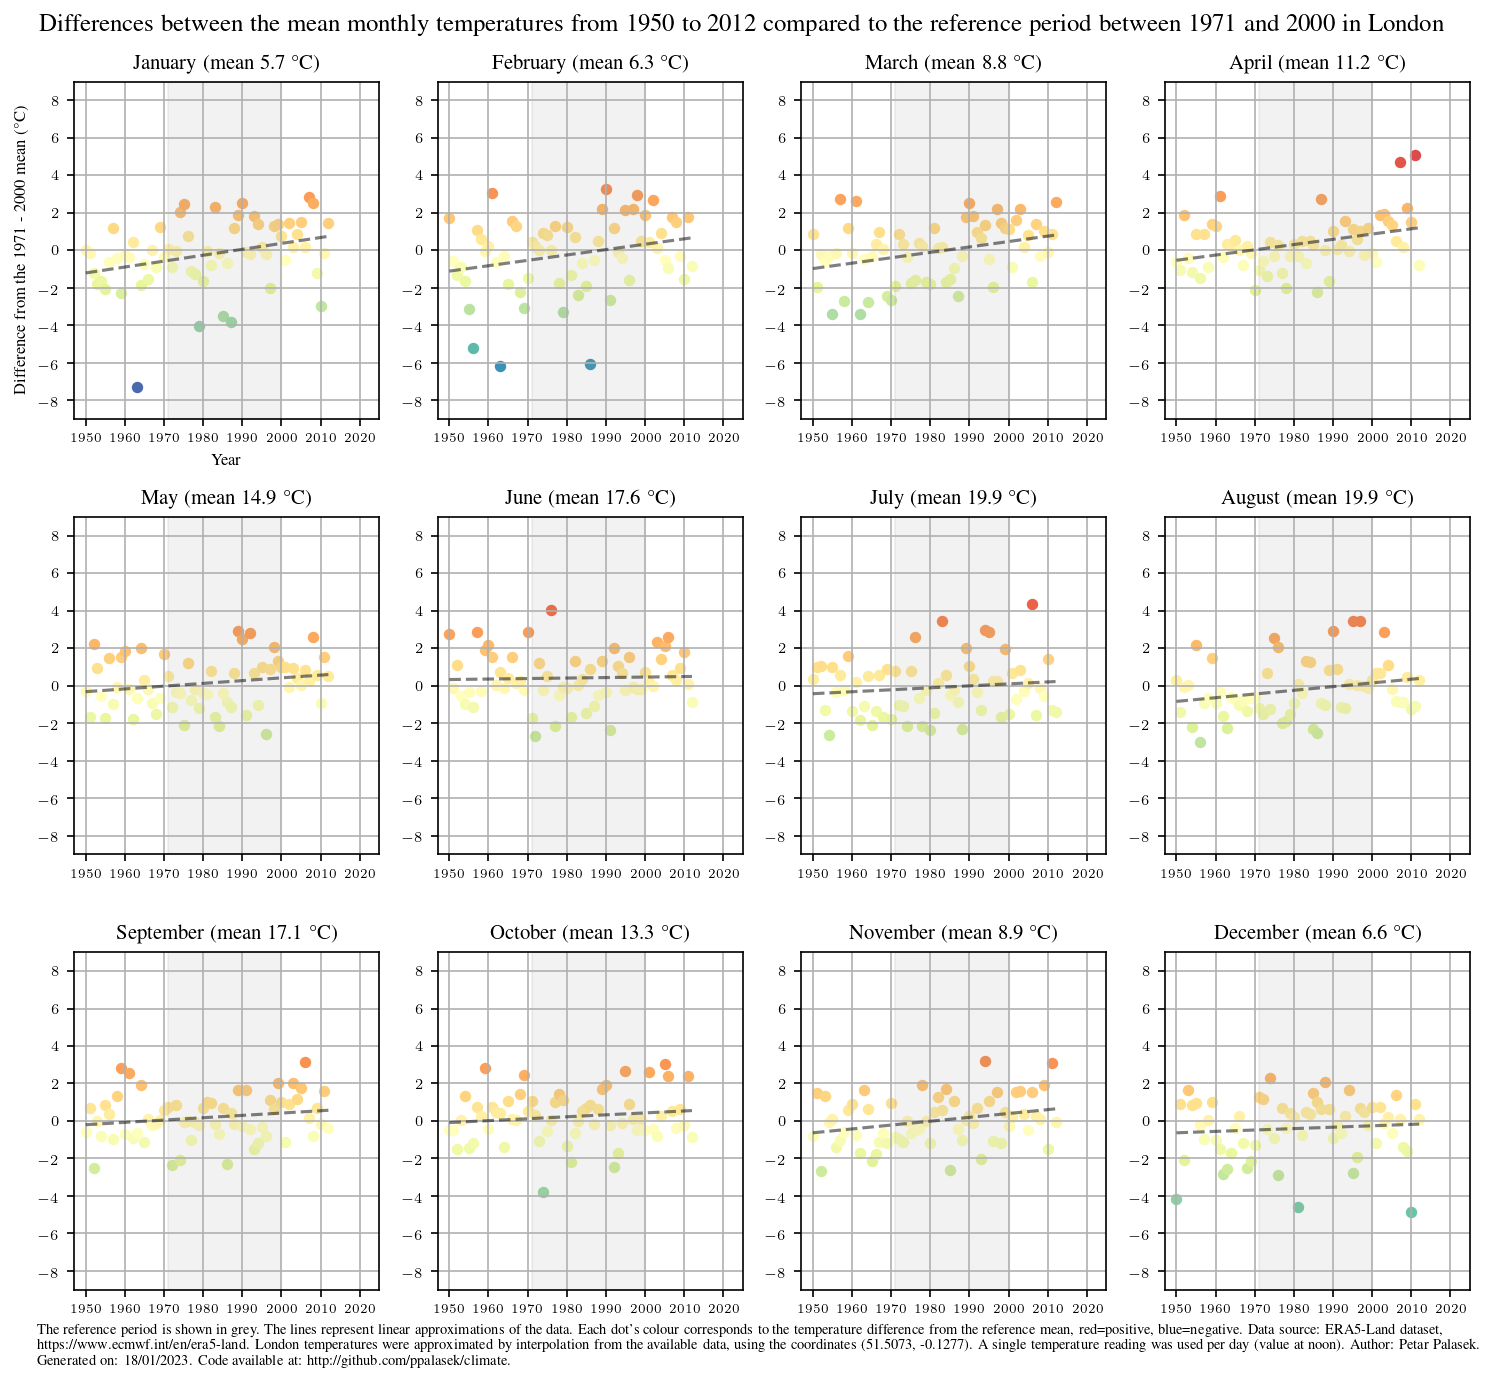

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


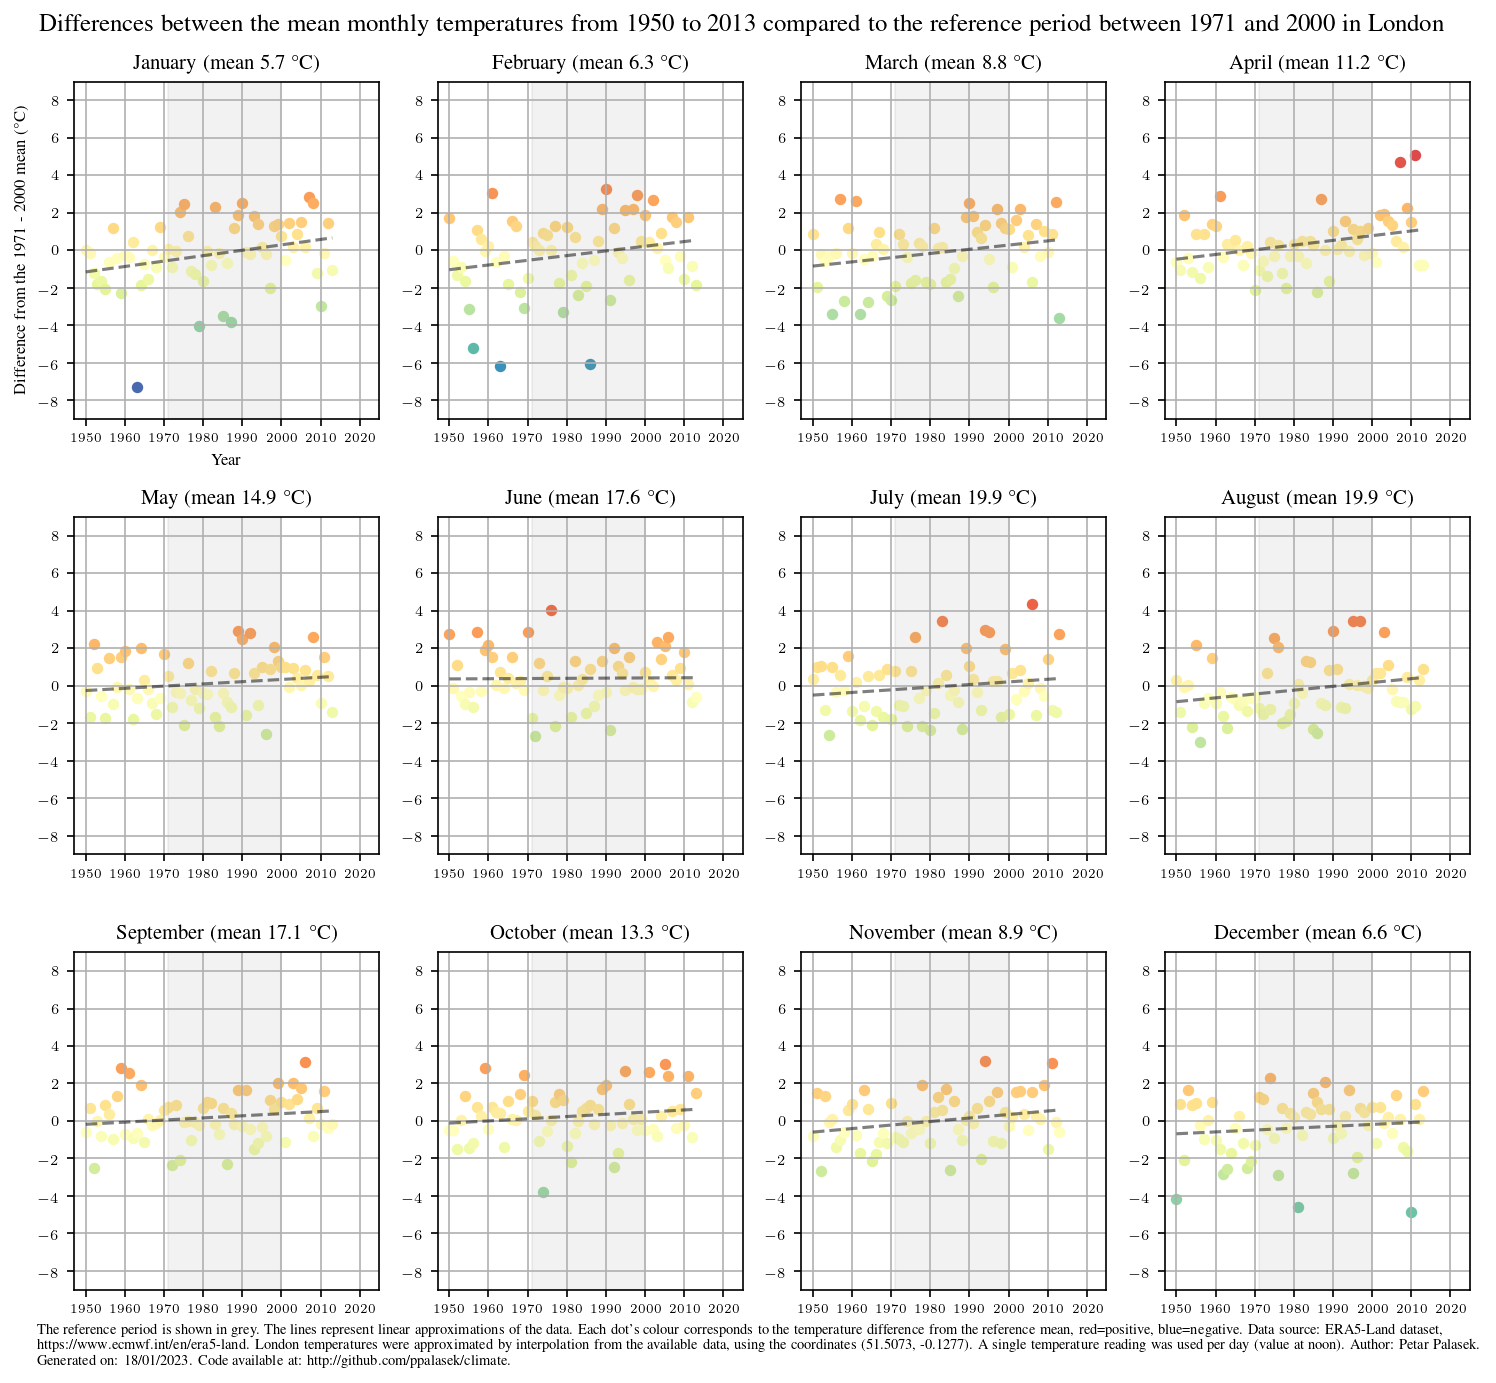

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


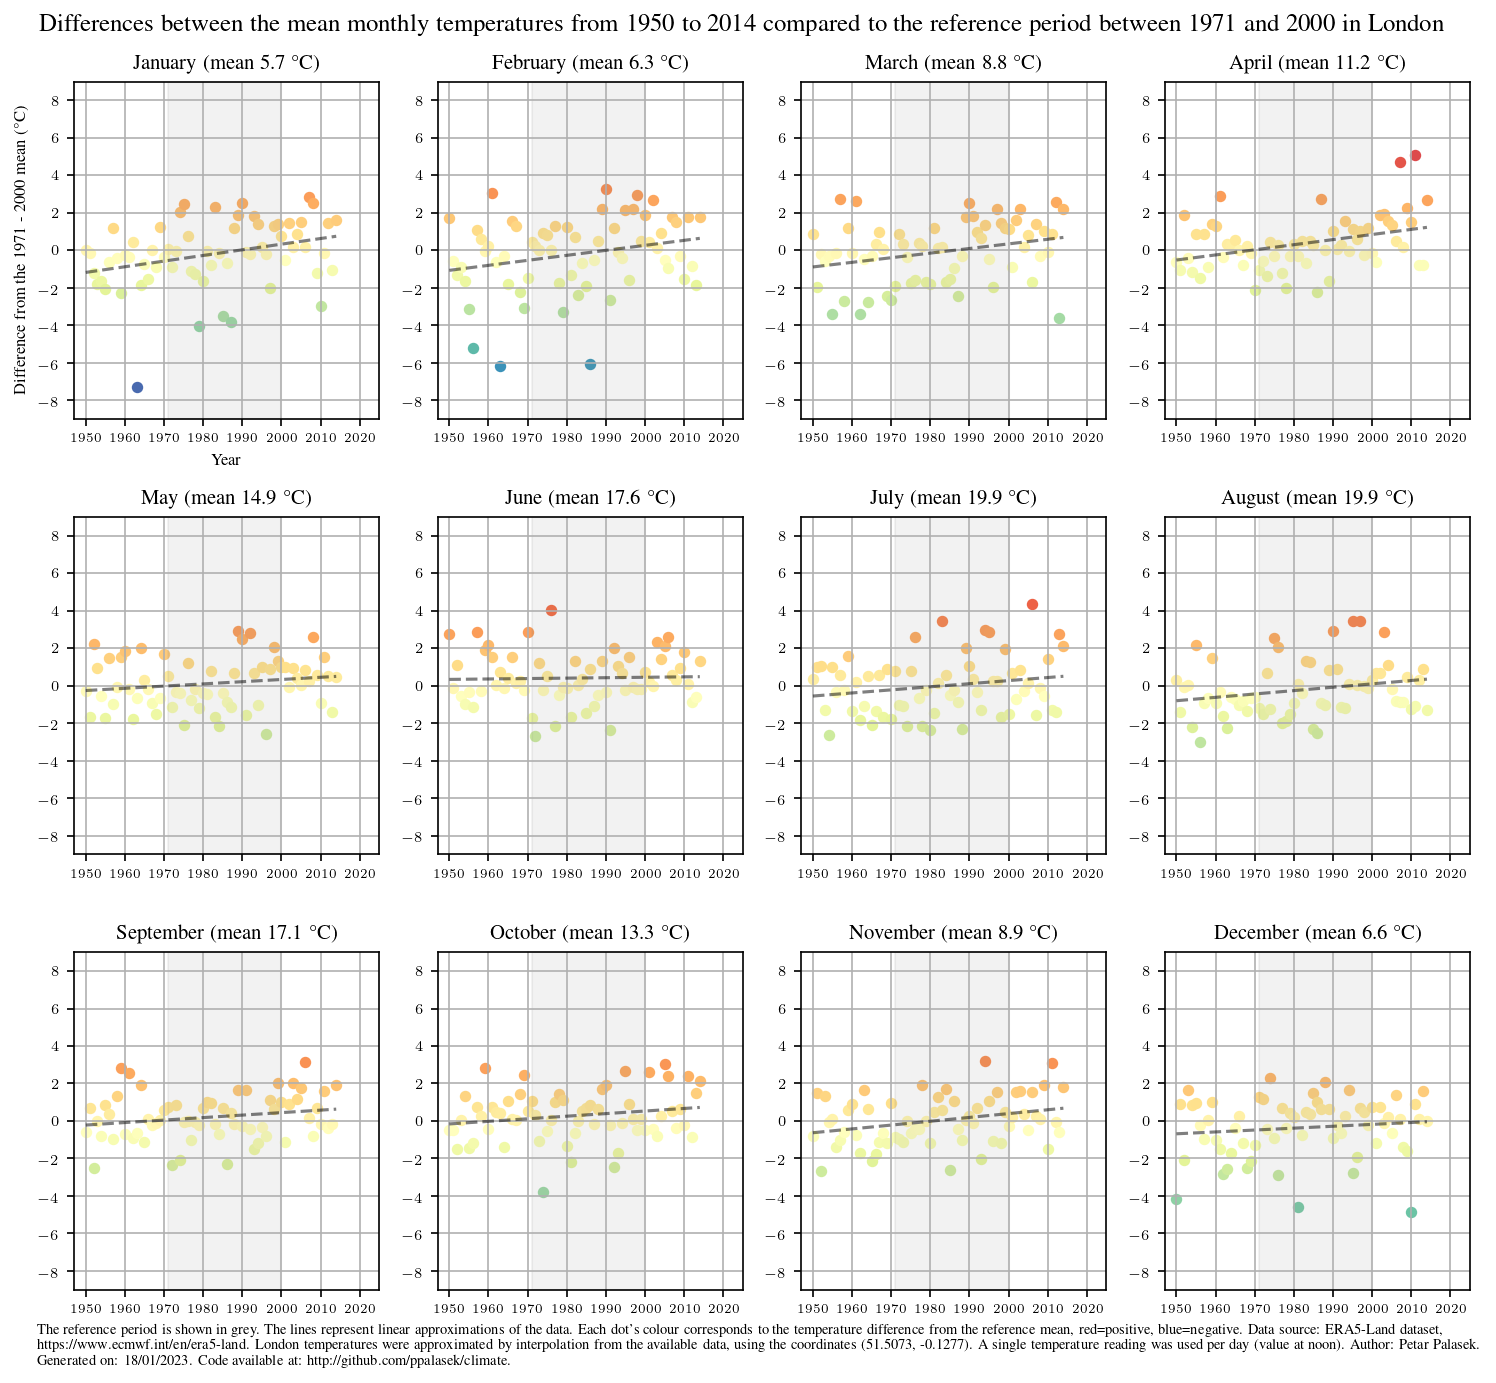

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


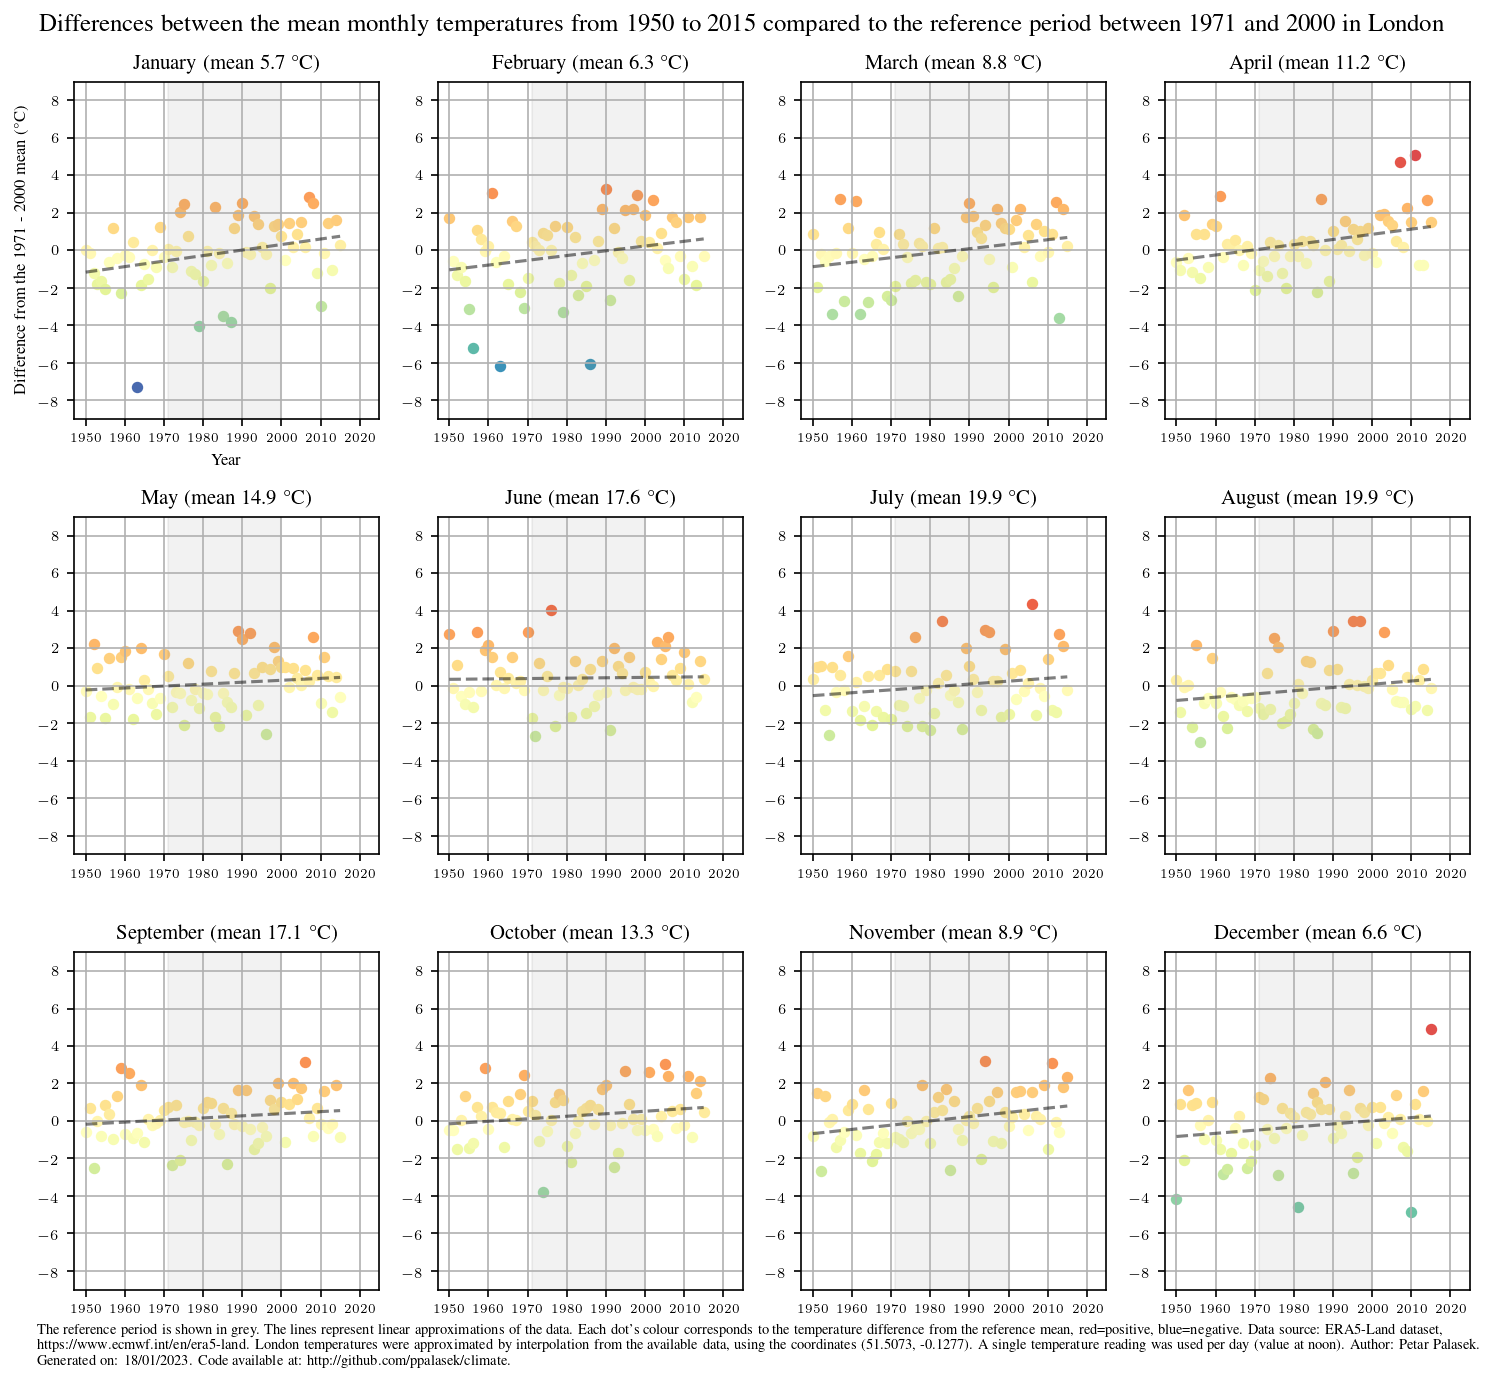

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


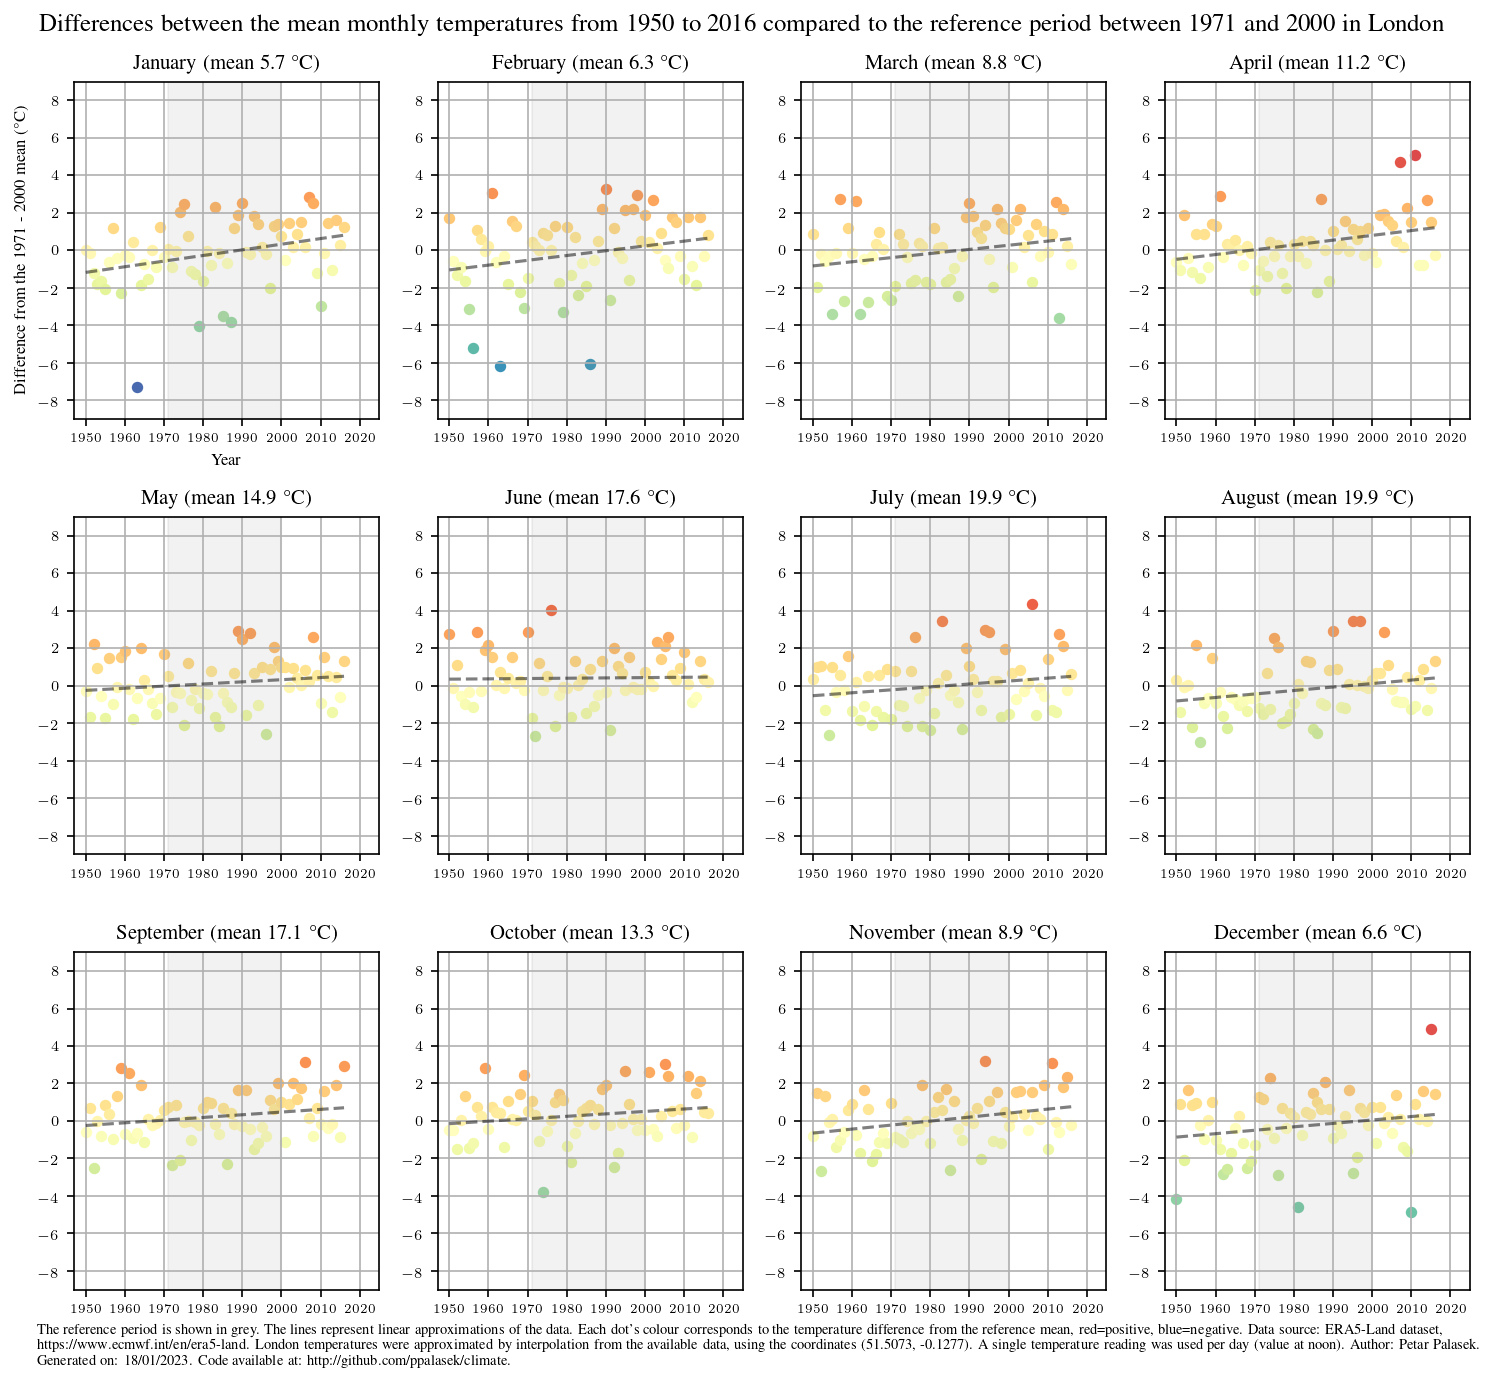

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


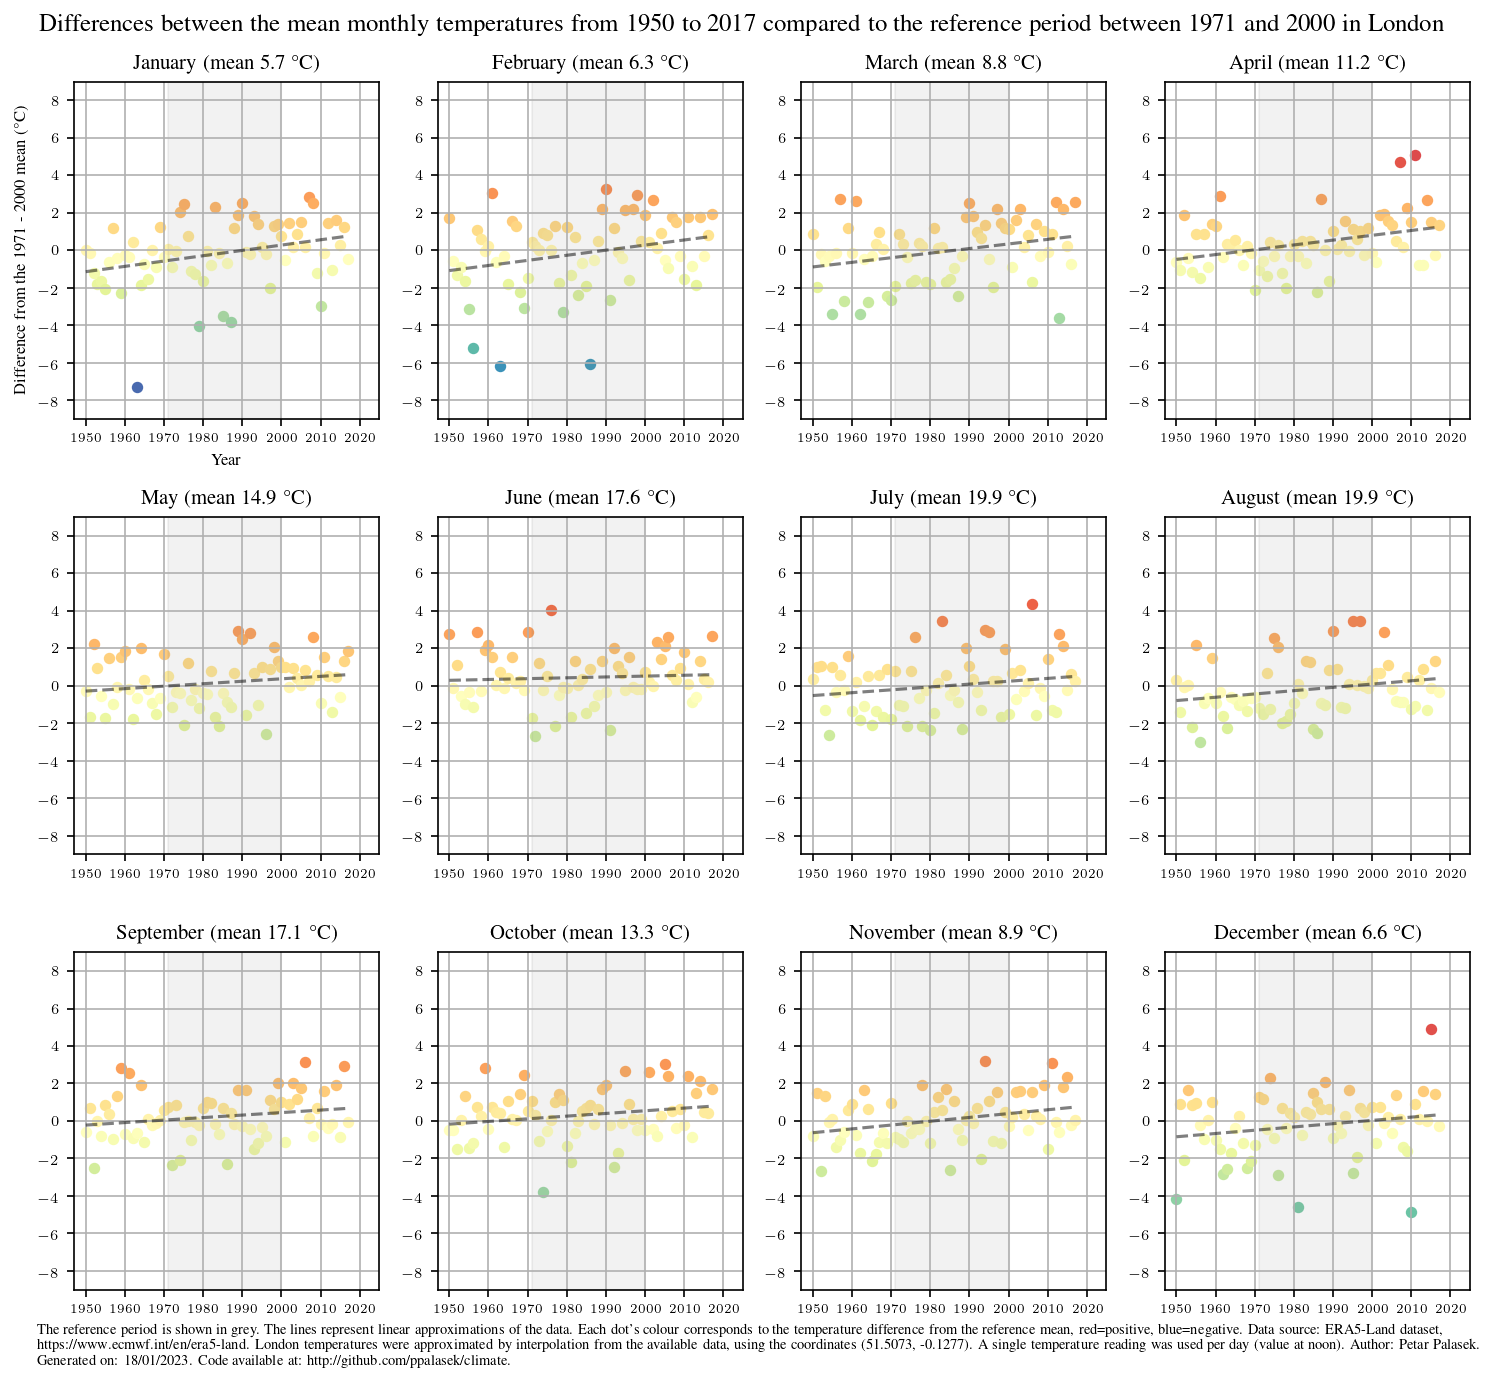

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


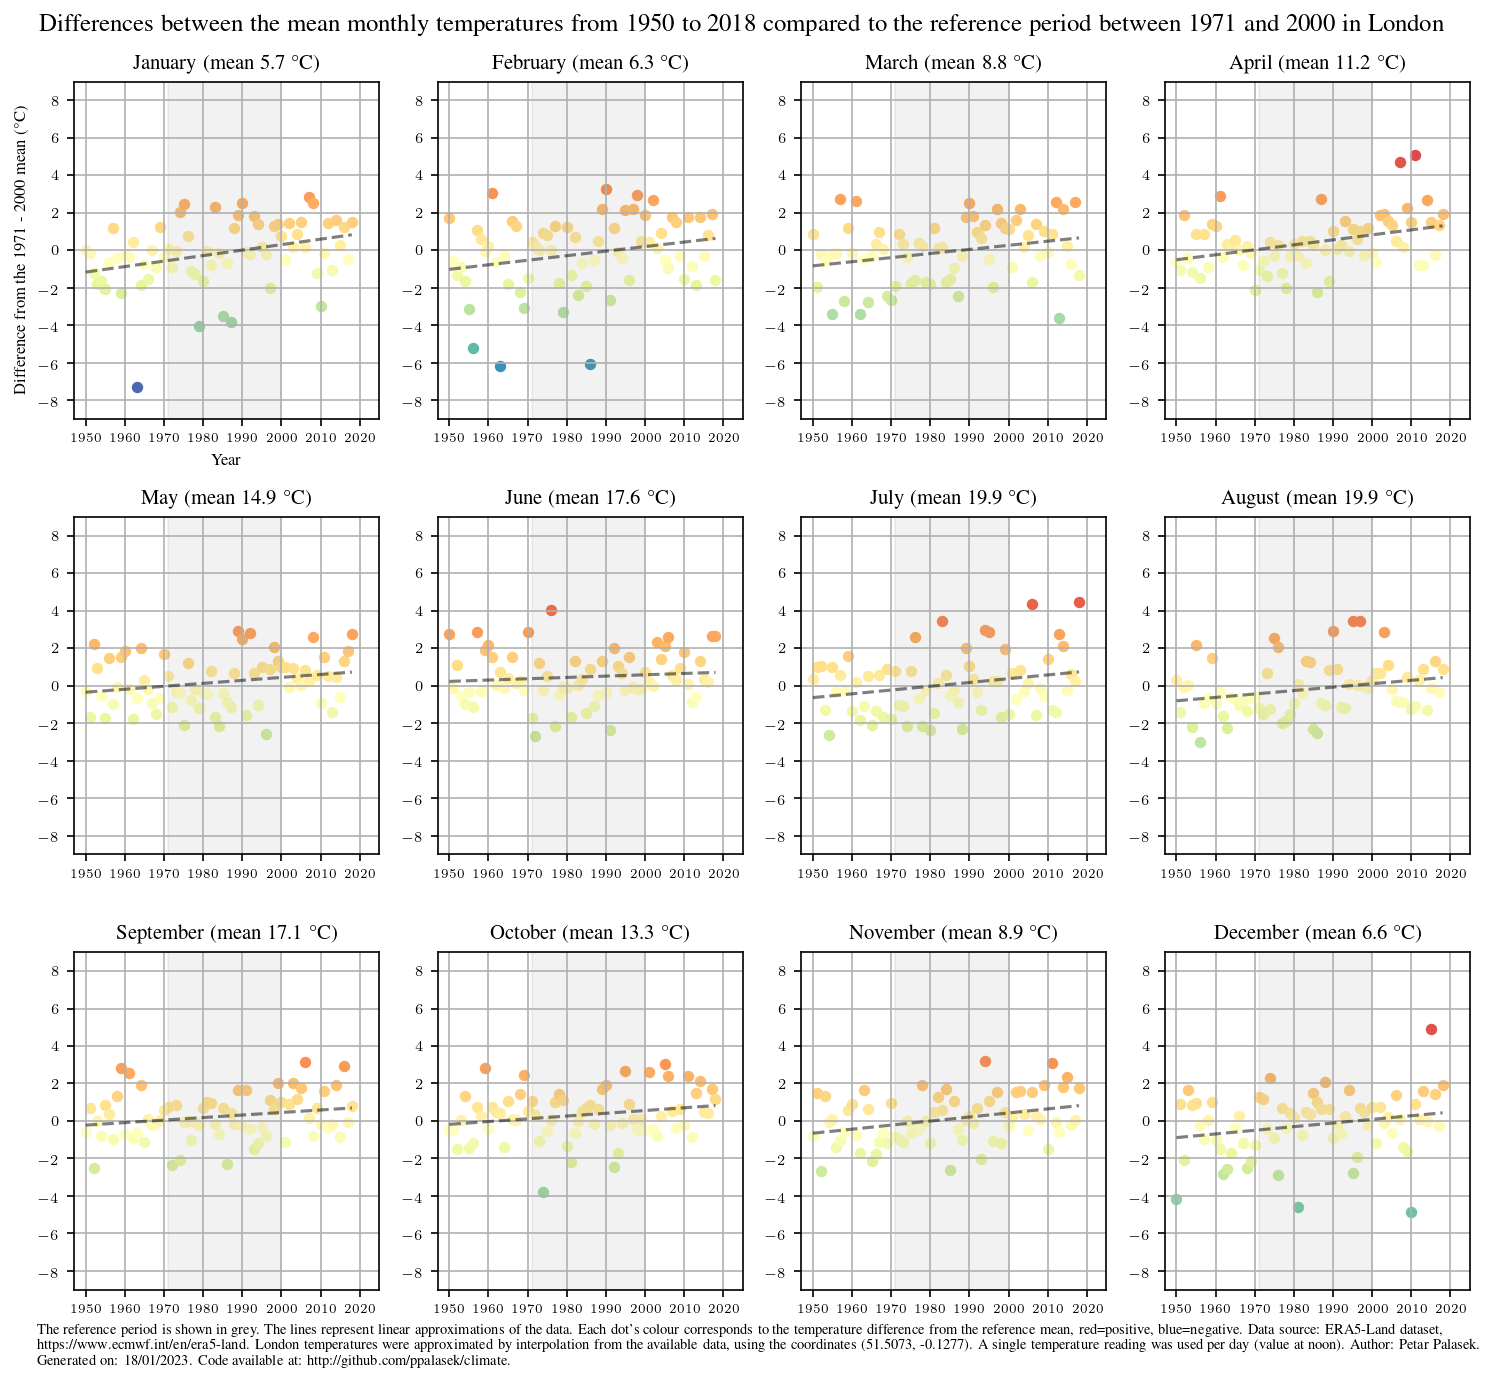

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


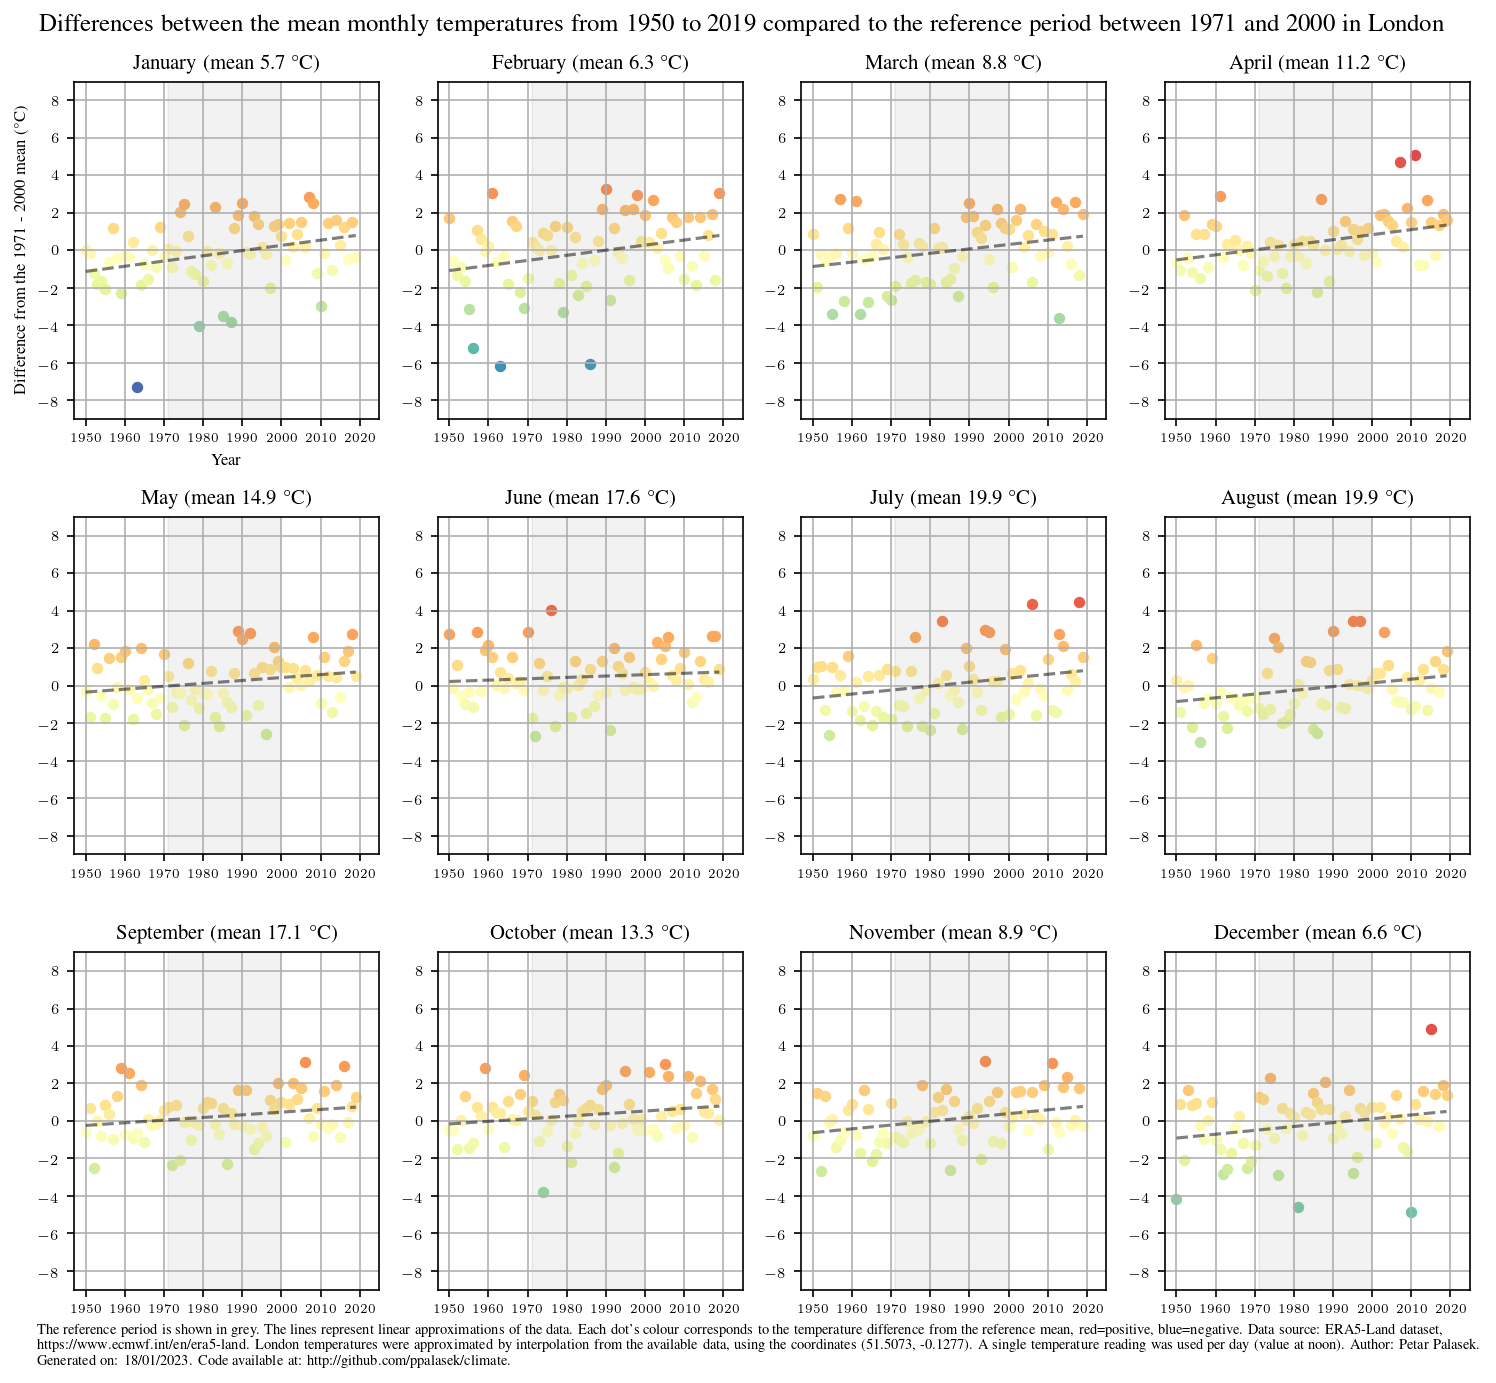

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


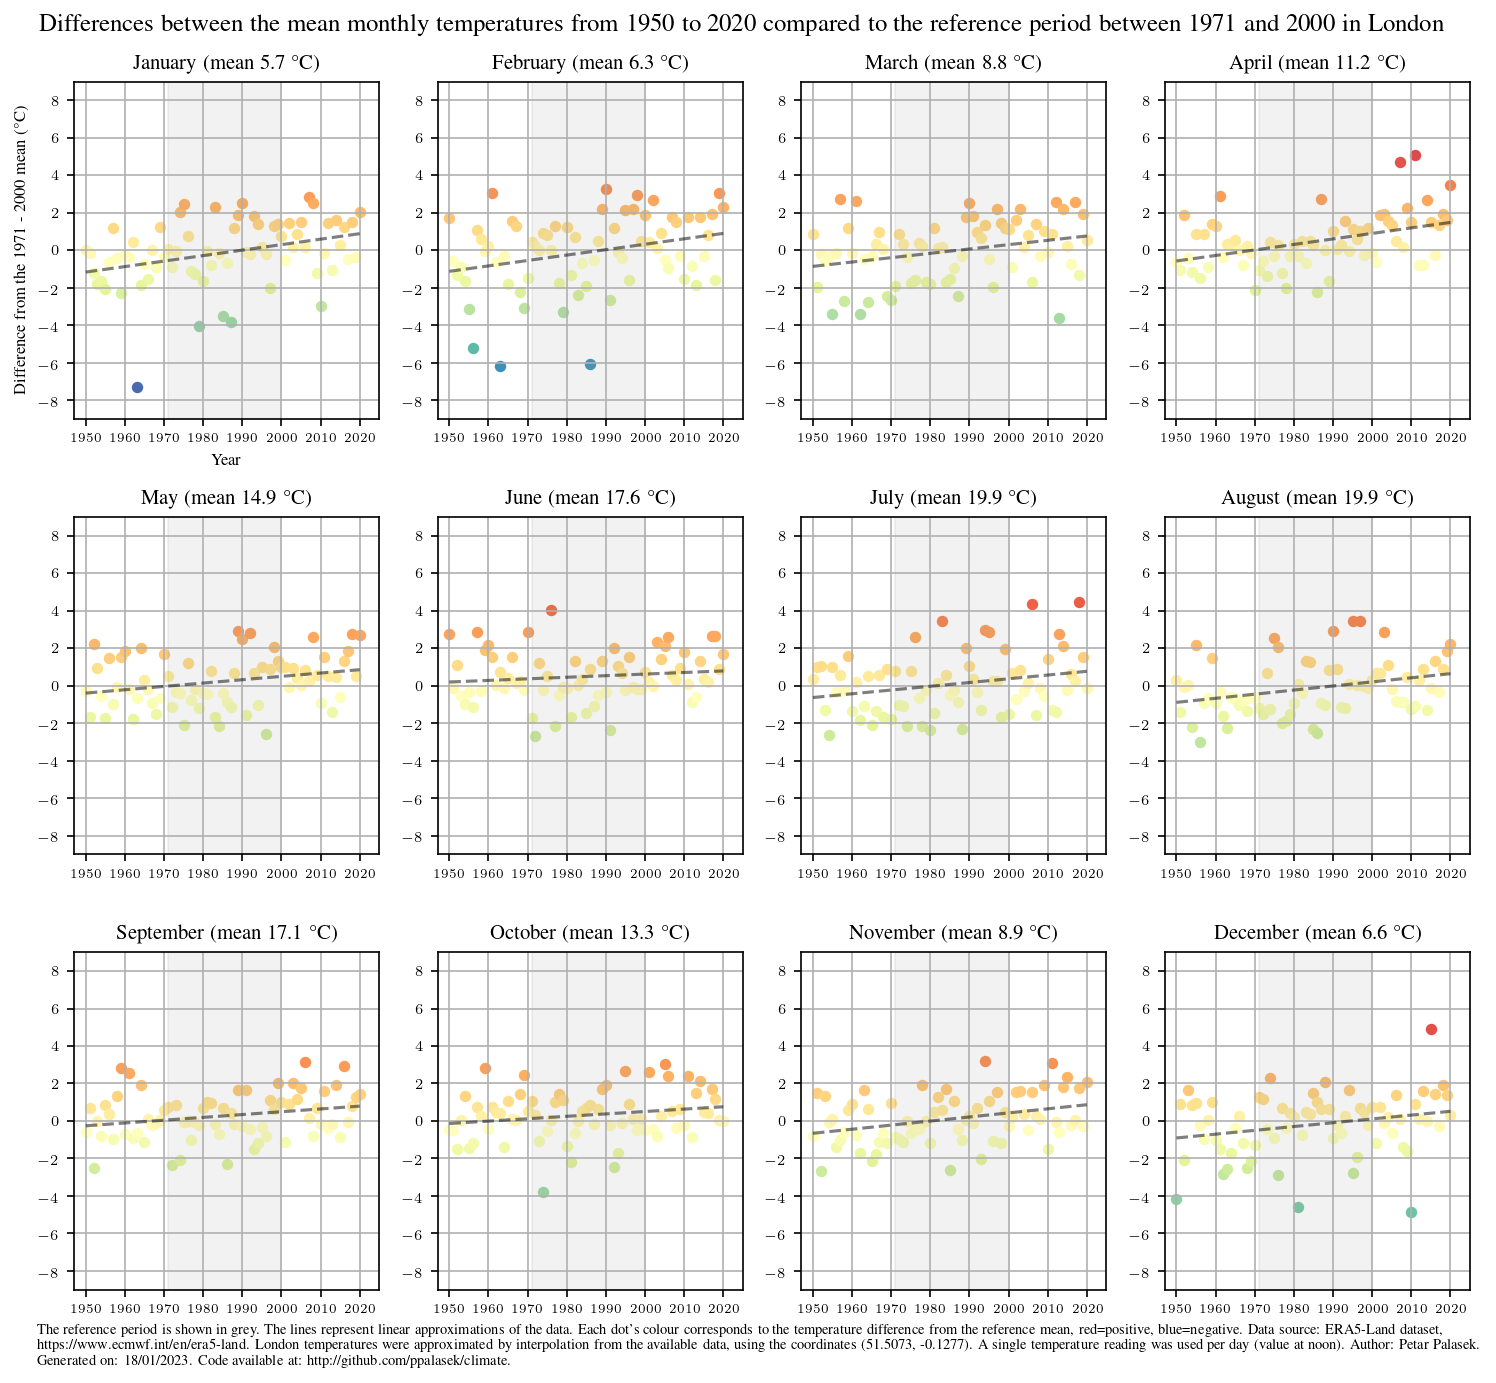

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


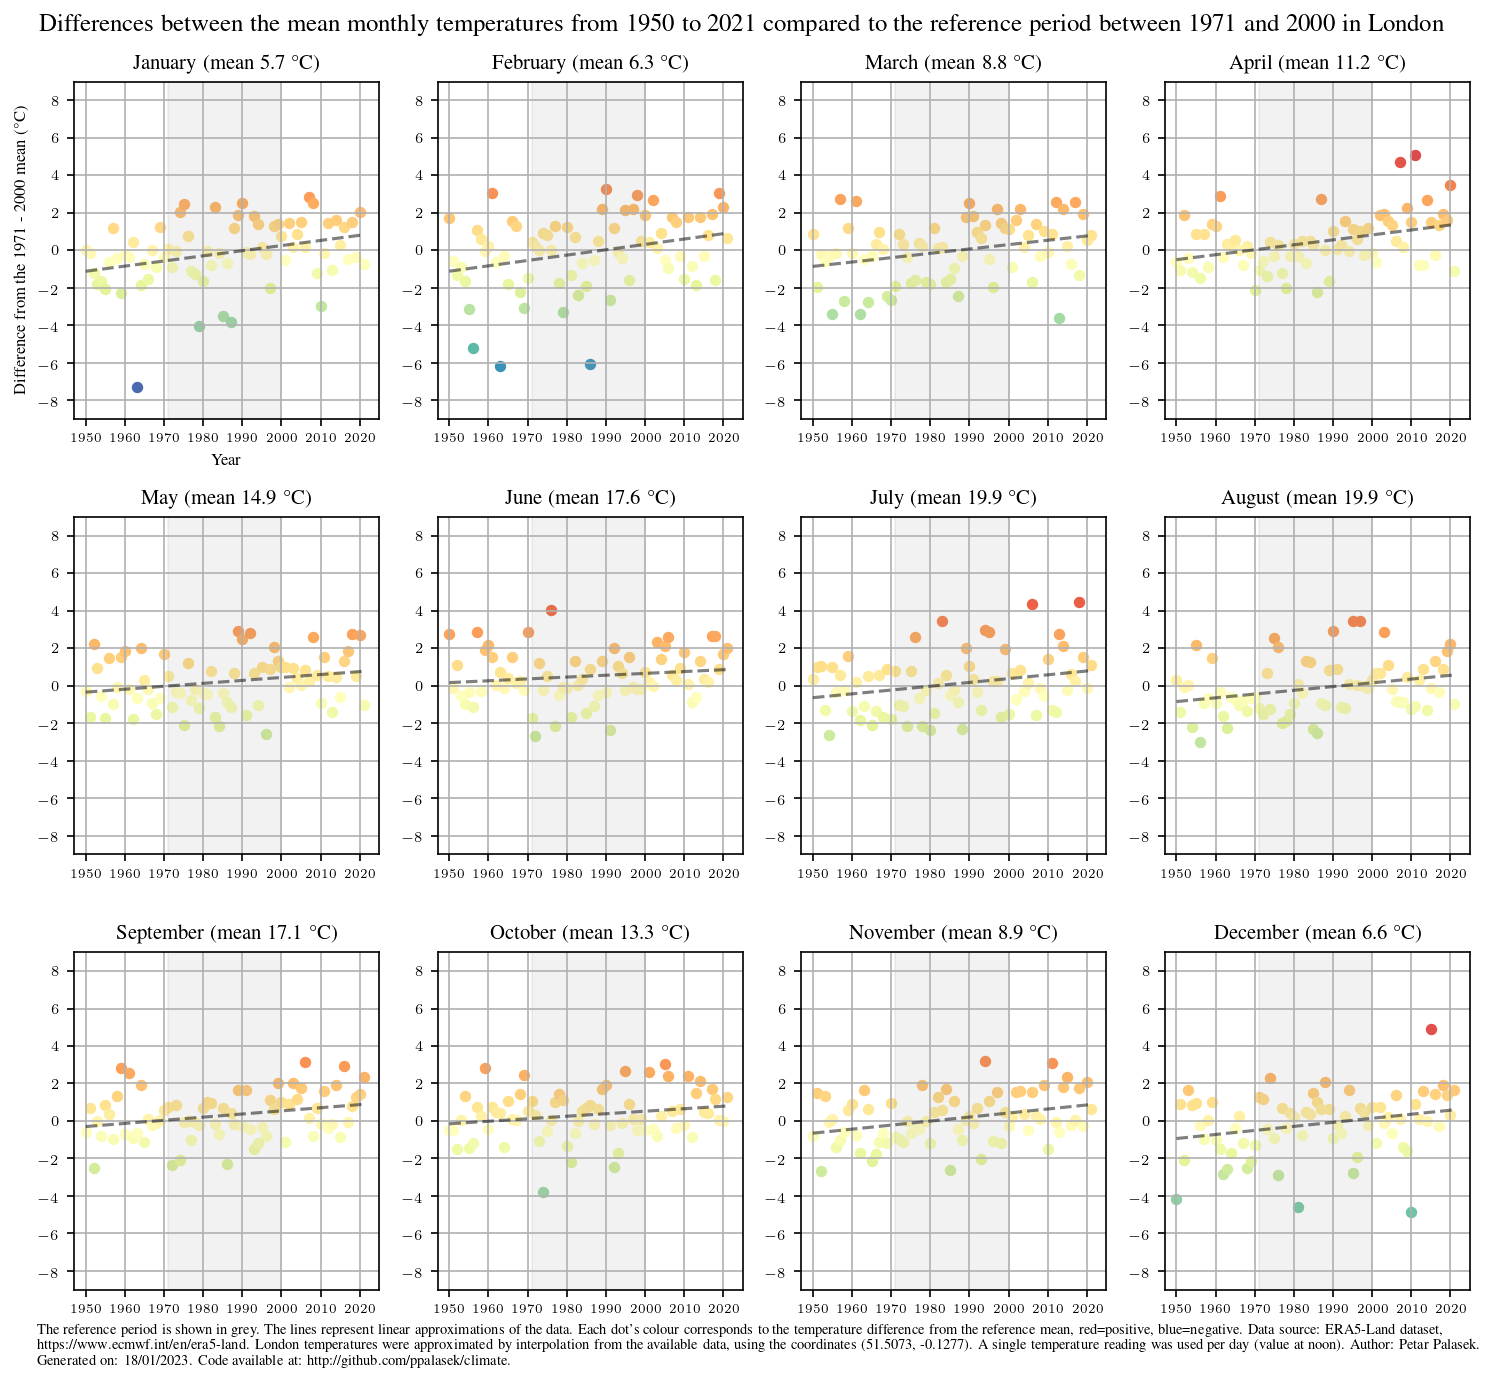

<ipython-input-15-bf0bddccd6cd>:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


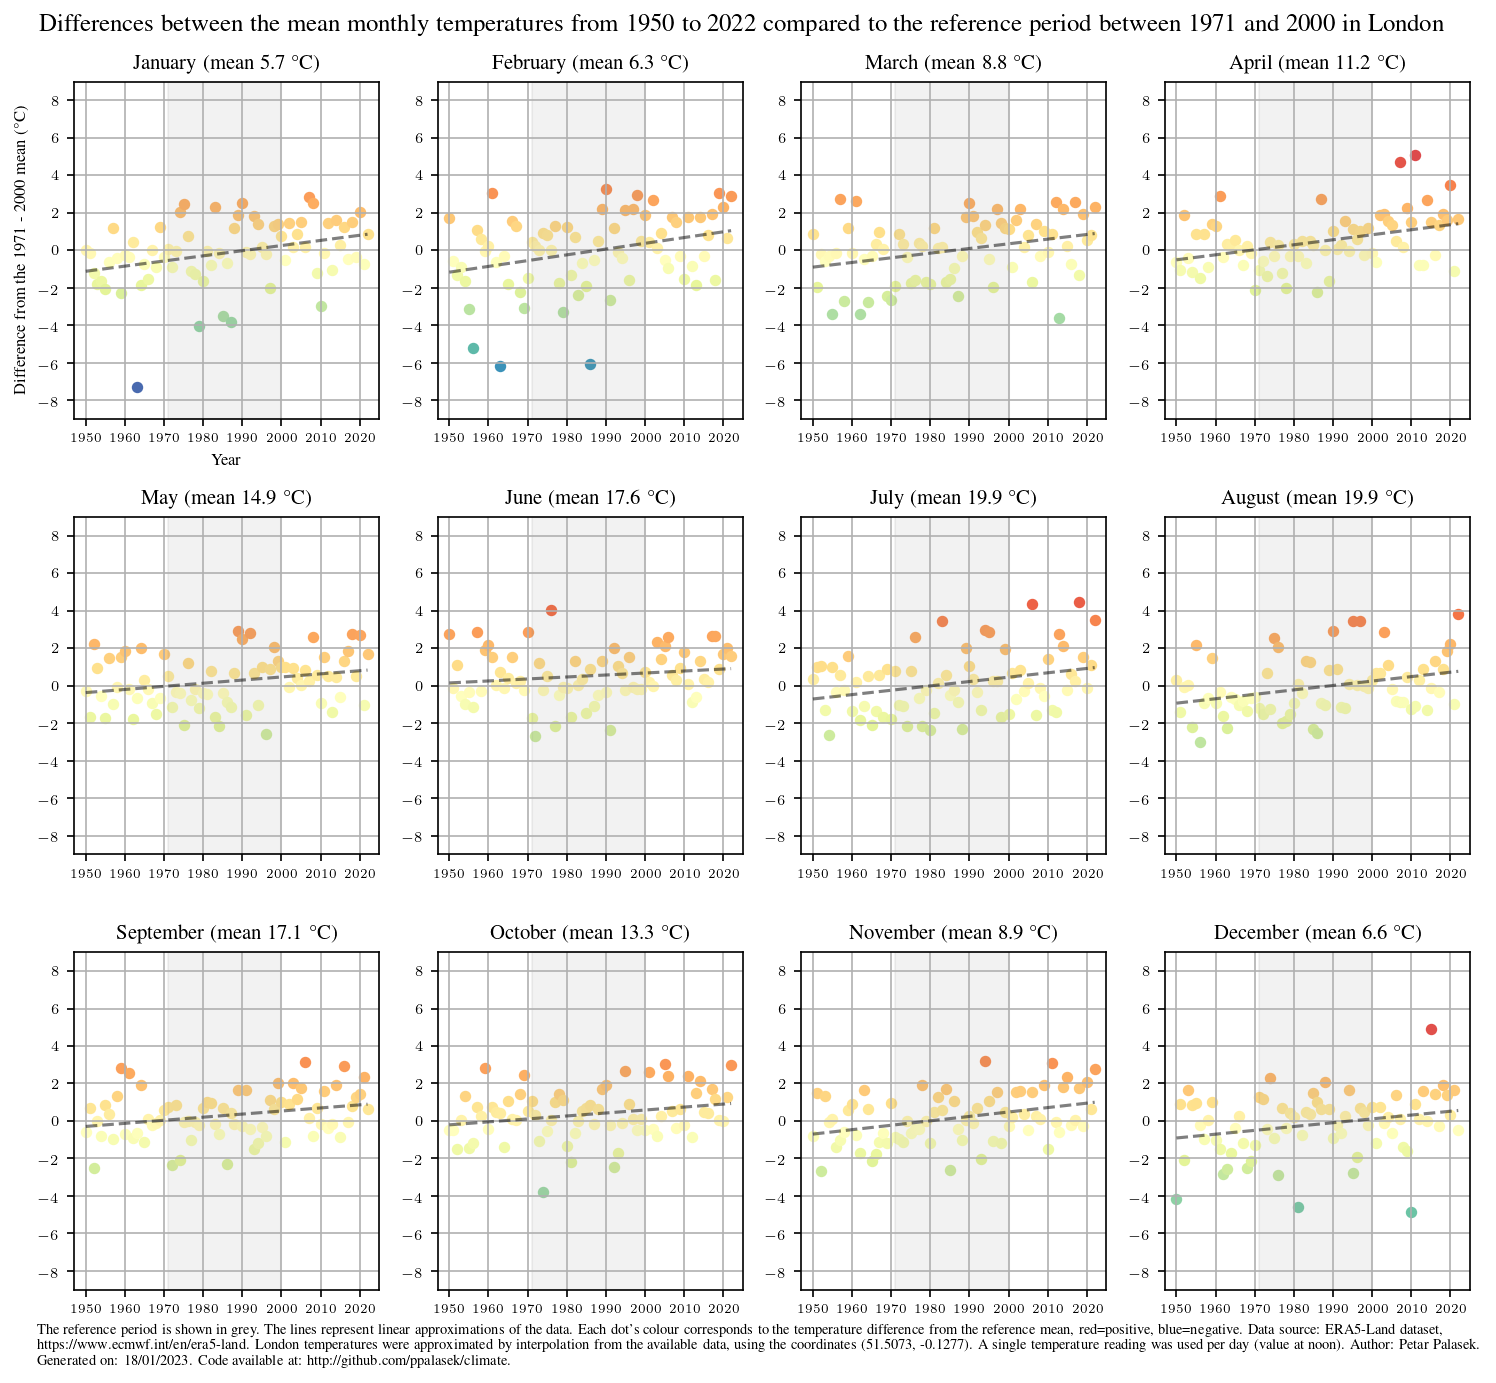

In [15]:
plt.rcParams.update(bundles.icml2022())
plt.rcParams.update({"figure.dpi": 150})
plt.rcParams.update({"font.size": 10})
plt.rcParams.update({"axes.titlesize": 10})

plt.rcParams.update({"xtick.labelsize": 6})
plt.rcParams.update({"ytick.labelsize": 7})

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


for last_year in range(2001, 2023):
    fig, axs = plt.subplots(3, 4, figsize=(10, 9))

    for month in range(1, 13):
        r = (month - 1) // 4
        c = (month - 1) % 4

        all_years = []
        all_years_for_mean = []


        axs[r, c].grid(True)

        for i, year in enumerate(mean_data_by_year_and_month):
            if year > last_year:
                continue
                
            if month in mean_data_by_year_and_month[year]:
                all_years.append(mean_data_by_year_and_month[year][month])

                if year > 1970 and year < 2001:
                    all_years_for_mean.append(mean_data_by_year_and_month[year][month])

        all_years_mean = np.asarray(all_years_for_mean).mean()

        for i, year in enumerate(mean_data_by_year_and_month):
            if year > last_year:
                continue
            
            if month in mean_data_by_year_and_month[year]:        
#                 axs[r, c].errorbar(year, mean_data_by_year_and_month[year][month] - all_years_mean, yerr=sem_data_by_year_and_month[year][month], color='black', alpha=0.1)
                
#                 axs[r, c].scatter(year, mean_data_by_year_and_month[year][month] - all_years_mean, color='black', s=35, alpha=0.2)                    
                axs[r, c].scatter(year, mean_data_by_year_and_month[year][month] - all_years_mean, color=cm.Spectral_r(((mean_data_by_year_and_month[year][month] - all_years_mean) + 8 )/15), s=20)

        x = np.asarray(range(len(all_years)))

        a, b = np.polyfit(x, all_years, 1)

        axs[r, c].plot(x + 1950, a * x + b - all_years_mean, color='black', linestyle='--', alpha=0.5)  


        axs[r, c].set_ylim(-9, 9)
        axs[r, c].set_xlim(1950 - 3, 2022 + 3)

        if r == 0 and c == 0:
            axs[r, c].set_xlabel('Year')
            axs[r, c].set_ylabel('Difference from the 1971 - 2000 mean (°C)')

        axs[r, c].title.set_text('{} (mean {:2.1f} °C)'.format(months[month - 1], all_years_mean))


        axs[r, c].axvspan(1971, 2000, alpha=0.1, color='gray')

    fig.suptitle('Differences between the mean monthly temperatures from 1950 to {} compared to the reference period between 1971 and 2000 in {}'.format(last_year, city))

    txt = 'The reference period is shown in grey. The lines represent linear approximations of the data. Each dot\'s colour corresponds to the temperature difference from the reference mean, red=positive, blue=negative. Data source: ERA5-Land dataset,\nhttps://www.ecmwf.int/en/era5-land. {} temperatures were approximated by interpolation from the available data, using the coordinates ({:.4f}, {:.4f}). A single temperature reading was used per day (value at noon). Author: Petar Palasek.\nGenerated on: {}. Code available at: http://github.com/ppalasek/climate. '.format(city, location[0], location[1], datetime.strftime(today, '%d/%m/%Y'))
    plt.figtext(0.03, -0.02, txt, wrap=True, horizontalalignment='left', fontsize=7)

    plt.tight_layout()


#     plt.savefig('image_{}_{}_150.png'.format(city, last_year), dpi=150, transparent=False, bbox_inches='tight', facecolor="white")
    plt.savefig('image_{}_{}_200.png'.format(city, last_year), dpi=200, transparent=False, bbox_inches='tight', facecolor="white")

    plt.show()
